<a href="https://colab.research.google.com/github/AristarkhovZakhar/deep_learning/blob/main/HEART_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [68]:
data = pd.read_csv('heart_disease_uci.csv', )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [69]:
num_cols = [
    'age',
    'trestbps',
    'chol',
    'thalch',
    'oldpeak',
    ]

cat_cols = [
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'slope',
    'thal',
    'ca',

]

target_col = ['num']
feature_cols = num_cols + cat_cols

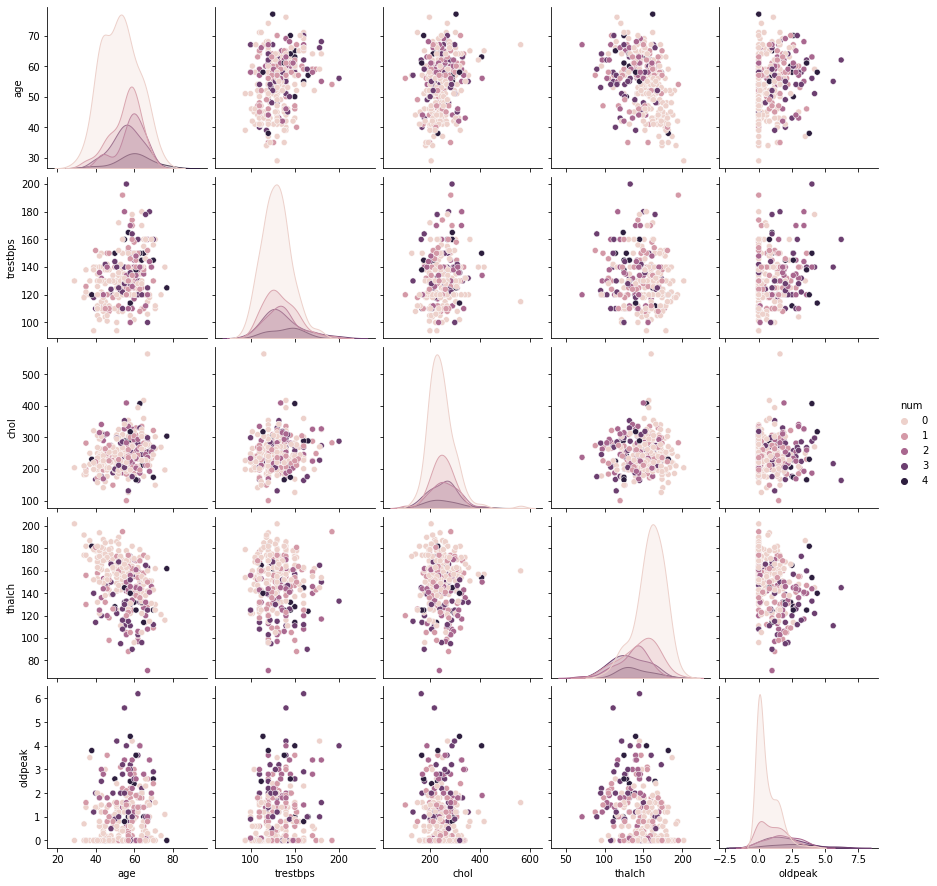

In [97]:
sns.pairplot(data[num_cols+target_col], hue = 'num')

In [70]:
for column in cat_cols:
  data[column].replace('', np.nan, inplace = True)
  data.dropna(subset=[column], inplace = True)

for column in num_cols:
  data.dropna(subset=[column], inplace = True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [72]:
data= pd.get_dummies(data, columns=cat_cols)

In [73]:
data.info

<bound method DataFrame.info of       id  age        dataset  trestbps   chol  thalch  oldpeak  num  \
0      1   63      Cleveland     145.0  233.0   150.0      2.3    0   
1      2   67      Cleveland     160.0  286.0   108.0      1.5    2   
2      3   67      Cleveland     120.0  229.0   129.0      2.6    1   
3      4   37      Cleveland     130.0  250.0   187.0      3.5    0   
4      5   41      Cleveland     130.0  204.0   172.0      1.4    0   
..   ...  ...            ...       ...    ...     ...      ...  ...   
299  300   68      Cleveland     144.0  193.0   141.0      3.4    2   
300  301   57      Cleveland     130.0  131.0   115.0      1.2    3   
301  302   57      Cleveland     130.0  236.0   174.0      0.0    1   
508  509   47        Hungary     150.0  226.0    98.0      1.5    1   
748  749   56  VA Long Beach     120.0  100.0   120.0      1.5    1   

     sex_Female  sex_Male  ...  slope_downsloping  slope_flat  \
0             0         1  ...                  1 

In [74]:
data.head()

,id,age,dataset,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,...,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,2,67,Cleveland,160.0,286.0,108.0,1.5,2,0,1,...,0,1,0,0,1,0,0,0,0,1
2,3,67,Cleveland,120.0,229.0,129.0,2.6,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [75]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(data.drop(['num', 'id','dataset'], axis=1))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, data['num'], test_size=0.2, random_state=42)

In [77]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [79]:
from sklearn.model_selection import GridSearchCV

In [83]:
search_rbf = GridSearchCV(svm.SVC(kernel='poly', gamma='auto'),
                               param_grid = {
                                   'C' : np.arange(0.1, 10, 0.1),
                                   'degree' : np.arange(1,30),
                                   'coef0' : np.arange(1, 10, 2)
                                   },
                               scoring = 'accuracy',
                               cv = 5,
                               refit=True,
                               verbose=10)
search_rbf.fit(X_train, y_train)
search_rbf_predict = search_rbf.predict(X_test)
print(accuracy_score(y_test, search_rbf_predict))

Выходные данные были обрезаны до нескольких последних строк (5000).
[CV 1/5; 13856/14355] END C=9.6, coef0=5, degree=23;, score=0.542 total time=   0.0s
[CV 2/5; 13856/14355] START C=9.6, coef0=5, degree=23...........................
[CV 2/5; 13856/14355] END C=9.6, coef0=5, degree=23;, score=0.604 total time=   0.0s
[CV 3/5; 13856/14355] START C=9.6, coef0=5, degree=23...........................
[CV 3/5; 13856/14355] END C=9.6, coef0=5, degree=23;, score=0.542 total time=   0.0s
[CV 4/5; 13856/14355] START C=9.6, coef0=5, degree=23...........................
[CV 4/5; 13856/14355] END C=9.6, coef0=5, degree=23;, score=0.521 total time=   0.0s
[CV 5/5; 13856/14355] START C=9.6, coef0=5, degree=23...........................
[CV 5/5; 13856/14355] END C=9.6, coef0=5, degree=23;, score=0.638 total time=   0.0s
[CV 1/5; 13857/14355] START C=9.6, coef0=5, degree=24...........................
[CV 1/5; 13857/14355] END C=9.6, coef0=5, degree=24;, score=0.542 total time=   0.0s
[CV 2/5; 13857/14

In [84]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print(accuracy_score(y_test, clf_predict))

0.5833333333333334


In [ ]:
search_sigmoid = GridSearchCV(svm.SVC(kernel='rbf'),
                               param_grid = {
                                   'gamma' : np.arange(0.0079, 0.008, 0.000001),
                                   },
                               scoring = 'accuracy',
                               cv = 5,
                               refit=True,
                               verbose=10)
search_sigmoid.fit(X_train, y_train)
search_sigmoid_predict = search_sigmoid.predict(X_test)
print(search_sigmoid.best_params_)
print(accuracy_score(y_test, search_sigmoid_predict))

In [109]:
search_linear = GridSearchCV(svm.LinearSVC(),
                               param_grid = {
                                   'loss' : ['hinge', 'squared_hinge'],
                                   'C' : np.arange(1,100),
                                   'multi_class' : ['ovr', 'crammer_singer'],
                                   },
                               scoring = 'accuracy',
                               cv = 5,
                               refit=True,
                               verbose=10)
search_linear.fit(X_train, y_train)
search_linear_predict = search_linear.predict(X_test)
print(search_linear.best_params_)
print(accuracy_score(y_test, search_linear_predict))

Fitting 5 folds for each of 396 candidates, totalling 1980 fits
[CV 1/5; 1/396] START C=1, loss=hinge, multi_class=ovr..........................
[CV 1/5; 1/396] END C=1, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 2/5; 1/396] START C=1, loss=hinge, multi_class=ovr..........................
[CV 2/5; 1/396] END C=1, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 3/5; 1/396] START C=1, loss=hinge, multi_class=ovr..........................
[CV 3/5; 1/396] END C=1, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 4/5; 1/396] START C=1, loss=hinge, multi_class=ovr..........................
[CV 4/5; 1/396] END C=1, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 1/396] START C=1, loss=hinge, multi_class=ovr..........................
[CV 5/5; 1/396] END C=1, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.0s
[CV 1/5; 2/396] START C=1, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 1/5; 2/396] END C=1, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   0.1s
[CV 2/5; 2/396] START C=1, loss=hinge, multi_class=crammer_singer...............
[CV 2/5; 2/396] END C=1, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   0.1s
[CV 3/5; 2/396] START C=1, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 2/396] END C=1, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   0.2s
[CV 4/5; 2/396] START C=1, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 2/396] END C=1, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   0.2s
[CV 5/5; 2/396] START C=1, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 2/396] END C=1, loss=hinge, multi_class=crammer_singer;, score=0.617 total time=   0.3s
[CV 1/5; 3/396] START C=1, loss=squared_hinge, multi_class=ovr..................
[CV 1/5; 3/396] END C=1, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 3/396] START C=1, loss=squared_hinge, multi_class=ovr..................
[CV 2/5; 3/396] END C=1, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 3/396] START C=1, loss=squared_hinge, multi_class=ovr..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 3/396] END C=1, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 3/396] START C=1, loss=squared_hinge, multi_class=ovr..................
[CV 4/5; 3/396] END C=1, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 3/396] START C=1, loss=squared_hinge, multi_class=ovr..................
[CV 5/5; 3/396] END C=1, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 4/396] START C=1, loss=squared_hinge, multi_class=crammer_singer.......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 4/396] END C=1, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   0.3s
[CV 2/5; 4/396] START C=1, loss=squared_hinge, multi_class=crammer_singer.......
[CV 2/5; 4/396] END C=1, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   0.2s
[CV 3/5; 4/396] START C=1, loss=squared_hinge, multi_class=crammer_singer.......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 4/396] END C=1, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   0.4s
[CV 4/5; 4/396] START C=1, loss=squared_hinge, multi_class=crammer_singer.......
[CV 4/5; 4/396] END C=1, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   0.2s
[CV 5/5; 4/396] START C=1, loss=squared_hinge, multi_class=crammer_singer.......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 4/396] END C=1, loss=squared_hinge, multi_class=crammer_singer;, score=0.617 total time=   0.3s
[CV 1/5; 5/396] START C=2, loss=hinge, multi_class=ovr..........................
[CV 1/5; 5/396] END C=2, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 5/396] START C=2, loss=hinge, multi_class=ovr..........................
[CV 2/5; 5/396] END C=2, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 3/5; 5/396] START C=2, loss=hinge, multi_class=ovr..........................
[CV 3/5; 5/396] END C=2, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 4/5; 5/396] START C=2, loss=hinge, multi_class=ovr..........................
[CV 4/5; 5/396] END C=2, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 5/396] START C=2, loss=hinge, multi_class=ovr..........................
[CV 5/5; 5/396] END C=2, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 6/396] START C=2, loss=hinge, multi_class=crammer_s

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 6/396] END C=2, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   0.6s
[CV 2/5; 6/396] START C=2, loss=hinge, multi_class=crammer_singer...............
[CV 2/5; 6/396] END C=2, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   0.1s
[CV 3/5; 6/396] START C=2, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 6/396] END C=2, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   0.1s
[CV 4/5; 6/396] START C=2, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 6/396] END C=2, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.2s
[CV 5/5; 6/396] START C=2, loss=hinge, multi_class=crammer_singer...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 6/396] END C=2, loss=hinge, multi_class=crammer_singer;, score=0.638 total time=   0.3s
[CV 1/5; 7/396] START C=2, loss=squared_hinge, multi_class=ovr..................
[CV 1/5; 7/396] END C=2, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 7/396] START C=2, loss=squared_hinge, multi_class=ovr..................
[CV 2/5; 7/396] END C=2, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 7/396] START C=2, loss=squared_hinge, multi_class=ovr..................
[CV 3/5; 7/396] END C=2, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 7/396] START C=2, loss=squared_hinge, multi_class=ovr..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 7/396] END C=2, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 7/396] START C=2, loss=squared_hinge, multi_class=ovr..................
[CV 5/5; 7/396] END C=2, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 8/396] START C=2, loss=squared_hinge, multi_class=crammer_singer.......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 8/396] END C=2, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   0.2s
[CV 2/5; 8/396] START C=2, loss=squared_hinge, multi_class=crammer_singer.......
[CV 2/5; 8/396] END C=2, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   0.1s
[CV 3/5; 8/396] START C=2, loss=squared_hinge, multi_class=crammer_singer.......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 8/396] END C=2, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   0.2s
[CV 4/5; 8/396] START C=2, loss=squared_hinge, multi_class=crammer_singer.......
[CV 4/5; 8/396] END C=2, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.1s
[CV 5/5; 8/396] START C=2, loss=squared_hinge, multi_class=crammer_singer.......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 8/396] END C=2, loss=squared_hinge, multi_class=crammer_singer;, score=0.638 total time=   0.3s
[CV 1/5; 9/396] START C=3, loss=hinge, multi_class=ovr..........................
[CV 1/5; 9/396] END C=3, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 9/396] START C=3, loss=hinge, multi_class=ovr..........................
[CV 2/5; 9/396] END C=3, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 3/5; 9/396] START C=3, loss=hinge, multi_class=ovr..........................
[CV 3/5; 9/396] END C=3, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 4/5; 9/396] START C=3, loss=hinge, multi_class=ovr..........................
[CV 4/5; 9/396] END C=3, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 9/396] START C=3, loss=hinge, multi_class=ovr..........................
[CV 5/5; 9/396] END C=3, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 10/396] START C=3, loss=hinge, multi_class=crammer_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 10/396] END C=3, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   1.0s
[CV 2/5; 10/396] START C=3, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 10/396] END C=3, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   0.5s
[CV 3/5; 10/396] START C=3, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 10/396] END C=3, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.6s
[CV 4/5; 10/396] START C=3, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 10/396] END C=3, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.6s
[CV 5/5; 10/396] START C=3, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 10/396] END C=3, loss=hinge, multi_class=crammer_singer;, score=0.638 total time=   0.5s
[CV 1/5; 11/396] START C=3, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 11/396] END C=3, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 11/396] START C=3, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 11/396] END C=3, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 11/396] START C=3, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 11/396] END C=3, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 11/396] START C=3, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 11/396] END C=3, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 11/396] START C=3, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 11/396] END C=3, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 12/396] START C=3, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 12/396] END C=3, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   1.6s
[CV 2/5; 12/396] START C=3, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 12/396] END C=3, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   0.3s
[CV 3/5; 12/396] START C=3, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 12/396] END C=3, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.2s
[CV 4/5; 12/396] START C=3, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 12/396] END C=3, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.7s
[CV 5/5; 12/396] START C=3, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 12/396] END C=3, loss=squared_hinge, multi_class=crammer_singer;, score=0.638 total time=   0.5s
[CV 1/5; 13/396] START C=4, loss=hinge, multi_class=ovr.........................
[CV 1/5; 13/396] END C=4, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 13/396] START C=4, loss=hinge, multi_class=ovr.........................
[CV 2/5; 13/396] END C=4, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 13/396] START C=4, loss=hinge, multi_class=ovr.........................
[CV 3/5; 13/396] END C=4, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 4/5; 13/396] START C=4, loss=hinge, multi_class=ovr.........................
[CV 4/5; 13/396] END C=4, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 13/396] START C=4, loss=hinge, multi_class=ovr.........................
[CV 5/5; 13/396] END C=4, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 14/396] START C=4, loss=hinge, multi_class=cr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 14/396] END C=4, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   0.5s
[CV 2/5; 14/396] START C=4, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 14/396] END C=4, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   1.5s
[CV 3/5; 14/396] START C=4, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 14/396] END C=4, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.4s
[CV 4/5; 14/396] START C=4, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 14/396] END C=4, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.5s
[CV 5/5; 14/396] START C=4, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 14/396] END C=4, loss=hinge, multi_class=crammer_singer;, score=0.638 total time=   0.4s
[CV 1/5; 15/396] START C=4, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 15/396] END C=4, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 15/396] START C=4, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 15/396] END C=4, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 15/396] START C=4, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 15/396] END C=4, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 15/396] START C=4, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 15/396] END C=4, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 15/396] START C=4, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 15/396] END C=4, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 16/396] START C=4, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 16/396] END C=4, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   0.9s
[CV 2/5; 16/396] START C=4, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 16/396] END C=4, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   1.2s
[CV 3/5; 16/396] START C=4, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 16/396] END C=4, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.4s
[CV 4/5; 16/396] START C=4, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 16/396] END C=4, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.7s
[CV 5/5; 16/396] START C=4, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 16/396] END C=4, loss=squared_hinge, multi_class=crammer_singer;, score=0.638 total time=   0.3s
[CV 1/5; 17/396] START C=5, loss=hinge, multi_class=ovr.........................
[CV 1/5; 17/396] END C=5, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 17/396] START C=5, loss=hinge, multi_class=ovr.........................
[CV 2/5; 17/396] END C=5, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 17/396] START C=5, loss=hinge, multi_class=ovr.........................
[CV 3/5; 17/396] END C=5, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 4/5; 17/396] START C=5, loss=hinge, multi_class=ovr.........................
[CV 4/5; 17/396] END C=5, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 17/396] START C=5, loss=hinge, multi_class=ovr.........................
[CV 5/5; 17/396] END C=5, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 18/396] START C=5, loss=hinge, multi_class=cr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 18/396] END C=5, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   0.5s
[CV 2/5; 18/396] START C=5, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 18/396] END C=5, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   2.3s
[CV 3/5; 18/396] START C=5, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 18/396] END C=5, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.5s
[CV 4/5; 18/396] START C=5, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 18/396] END C=5, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.4s
[CV 5/5; 18/396] START C=5, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 18/396] END C=5, loss=hinge, multi_class=crammer_singer;, score=0.660 total time=   0.5s
[CV 1/5; 19/396] START C=5, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 19/396] END C=5, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 19/396] START C=5, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 19/396] END C=5, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 19/396] START C=5, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 19/396] END C=5, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 19/396] START C=5, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 19/396] END C=5, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 19/396] START C=5, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 19/396] END C=5, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 20/396] START C=5, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 20/396] END C=5, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   0.5s
[CV 2/5; 20/396] START C=5, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 20/396] END C=5, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   2.3s
[CV 3/5; 20/396] START C=5, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 20/396] END C=5, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.6s
[CV 4/5; 20/396] START C=5, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 20/396] END C=5, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.9s
[CV 5/5; 20/396] START C=5, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 20/396] END C=5, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   0.4s
[CV 1/5; 21/396] START C=6, loss=hinge, multi_class=ovr.........................
[CV 1/5; 21/396] END C=6, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 21/396] START C=6, loss=hinge, multi_class=ovr.........................
[CV 2/5; 21/396] END C=6, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 21/396] START C=6, loss=hinge, multi_class=ovr.........................
[CV 3/5; 21/396] END C=6, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 21/396] START C=6, loss=hinge, multi_class=ovr.........................
[CV 4/5; 21/396] END C=6, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 5/5; 21/396] START C=6, loss=hinge, multi_class=ovr.........................
[CV 5/5; 21/396] END C=6, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 22/396] START C=6, loss=hinge, multi_class=cr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 22/396] END C=6, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.7s
[CV 2/5; 22/396] START C=6, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 22/396] END C=6, loss=hinge, multi_class=crammer_singer;, score=0.646 total time=   0.9s
[CV 3/5; 22/396] START C=6, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 22/396] END C=6, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.8s
[CV 4/5; 22/396] START C=6, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 22/396] END C=6, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.4s
[CV 5/5; 22/396] START C=6, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 22/396] END C=6, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   0.8s
[CV 1/5; 23/396] START C=6, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 23/396] END C=6, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 23/396] START C=6, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 23/396] END C=6, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 23/396] START C=6, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 23/396] END C=6, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 23/396] START C=6, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 23/396] END C=6, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 23/396] START C=6, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 23/396] END C=6, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 24/396] START C=6, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 24/396] END C=6, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.5s
[CV 2/5; 24/396] START C=6, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 24/396] END C=6, loss=squared_hinge, multi_class=crammer_singer;, score=0.646 total time=   1.0s
[CV 3/5; 24/396] START C=6, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 24/396] END C=6, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.4s
[CV 4/5; 24/396] START C=6, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 24/396] END C=6, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.5s
[CV 5/5; 24/396] START C=6, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 24/396] END C=6, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   0.7s
[CV 1/5; 25/396] START C=7, loss=hinge, multi_class=ovr.........................
[CV 1/5; 25/396] END C=7, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 25/396] START C=7, loss=hinge, multi_class=ovr.........................
[CV 2/5; 25/396] END C=7, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 25/396] START C=7, loss=hinge, multi_class=ovr.........................
[CV 3/5; 25/396] END C=7, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 25/396] START C=7, loss=hinge, multi_class=ovr.........................
[CV 4/5; 25/396] END C=7, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 25/396] START C=7, loss=hinge, multi_class=ovr.........................
[CV 5/5; 25/396] END C=7, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 26/396] START C=7, loss=hinge, multi_class=cr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 26/396] END C=7, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.7s
[CV 2/5; 26/396] START C=7, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 26/396] END C=7, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   1.3s
[CV 3/5; 26/396] START C=7, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 26/396] END C=7, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.8s
[CV 4/5; 26/396] START C=7, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 26/396] END C=7, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.5s
[CV 5/5; 26/396] START C=7, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 26/396] END C=7, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   0.8s
[CV 1/5; 27/396] START C=7, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 27/396] END C=7, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 27/396] START C=7, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 27/396] END C=7, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 27/396] START C=7, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 27/396] END C=7, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 27/396] START C=7, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 27/396] END C=7, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 27/396] START C=7, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 27/396] END C=7, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 28/396] START C=7, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 28/396] END C=7, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.9s
[CV 2/5; 28/396] START C=7, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 28/396] END C=7, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   1.6s
[CV 3/5; 28/396] START C=7, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 28/396] END C=7, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   1.2s
[CV 4/5; 28/396] START C=7, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 28/396] END C=7, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.5s
[CV 5/5; 28/396] START C=7, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 28/396] END C=7, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   1.0s
[CV 1/5; 29/396] START C=8, loss=hinge, multi_class=ovr.........................
[CV 1/5; 29/396] END C=8, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 29/396] START C=8, loss=hinge, multi_class=ovr.........................
[CV 2/5; 29/396] END C=8, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 29/396] START C=8, loss=hinge, multi_class=ovr.........................
[CV 3/5; 29/396] END C=8, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 29/396] START C=8, loss=hinge, multi_class=ovr.........................
[CV 4/5; 29/396] END C=8, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 29/396] START C=8, loss=hinge, multi_class=ovr.........................
[CV 5/5; 29/396] END C=8, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 30/396] START C=8, loss=hinge, multi_class=cr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 30/396] END C=8, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   1.1s
[CV 2/5; 30/396] START C=8, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 30/396] END C=8, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   1.8s
[CV 3/5; 30/396] START C=8, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 30/396] END C=8, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   0.9s
[CV 4/5; 30/396] START C=8, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 30/396] END C=8, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.5s
[CV 5/5; 30/396] START C=8, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 30/396] END C=8, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   0.6s
[CV 1/5; 31/396] START C=8, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 31/396] END C=8, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 31/396] START C=8, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 31/396] END C=8, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 31/396] START C=8, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 31/396] END C=8, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 31/396] START C=8, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 31/396] END C=8, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 31/396] START C=8, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 31/396] END C=8, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 32/396] START C=8, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 32/396] END C=8, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   1.6s
[CV 2/5; 32/396] START C=8, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 32/396] END C=8, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   1.5s
[CV 3/5; 32/396] START C=8, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 32/396] END C=8, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   1.2s
[CV 4/5; 32/396] START C=8, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 32/396] END C=8, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.2s
[CV 5/5; 32/396] START C=8, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 32/396] END C=8, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   0.8s
[CV 1/5; 33/396] START C=9, loss=hinge, multi_class=ovr.........................
[CV 1/5; 33/396] END C=9, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 2/5; 33/396] START C=9, loss=hinge, multi_class=ovr.........................
[CV 2/5; 33/396] END C=9, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 33/396] START C=9, loss=hinge, multi_class=ovr.........................
[CV 3/5; 33/396] END C=9, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 33/396] START C=9, loss=hinge, multi_class=ovr.........................
[CV 4/5; 33/396] END C=9, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 33/396] START C=9, loss=hinge, multi_class=ovr.........................
[CV 5/5; 33/396] END C=9, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 34/396] START C=9, loss=hinge, multi_class=cr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 34/396] END C=9, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.9s
[CV 2/5; 34/396] START C=9, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 34/396] END C=9, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.9s
[CV 3/5; 34/396] START C=9, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 34/396] END C=9, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   1.2s
[CV 4/5; 34/396] START C=9, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 34/396] END C=9, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.8s
[CV 5/5; 34/396] START C=9, loss=hinge, multi_class=crammer_singer..............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 34/396] END C=9, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.2s
[CV 1/5; 35/396] START C=9, loss=squared_hinge, multi_class=ovr.................
[CV 1/5; 35/396] END C=9, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 35/396] START C=9, loss=squared_hinge, multi_class=ovr.................
[CV 2/5; 35/396] END C=9, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 35/396] START C=9, loss=squared_hinge, multi_class=ovr.................
[CV 3/5; 35/396] END C=9, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 35/396] START C=9, loss=squared_hinge, multi_class=ovr.................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 35/396] END C=9, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 35/396] START C=9, loss=squared_hinge, multi_class=ovr.................
[CV 5/5; 35/396] END C=9, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 36/396] START C=9, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 36/396] END C=9, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.7s
[CV 2/5; 36/396] START C=9, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 36/396] END C=9, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 36/396] START C=9, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 36/396] END C=9, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   1.8s
[CV 4/5; 36/396] START C=9, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 36/396] END C=9, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.6s
[CV 5/5; 36/396] START C=9, loss=squared_hinge, multi_class=crammer_singer......


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 36/396] END C=9, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   0.8s
[CV 1/5; 37/396] START C=10, loss=hinge, multi_class=ovr........................
[CV 1/5; 37/396] END C=10, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 37/396] START C=10, loss=hinge, multi_class=ovr........................
[CV 2/5; 37/396] END C=10, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 37/396] START C=10, loss=hinge, multi_class=ovr........................
[CV 3/5; 37/396] END C=10, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 37/396] START C=10, loss=hinge, multi_class=ovr........................
[CV 4/5; 37/396] END C=10, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 37/396] START C=10, loss=hinge, multi_class=ovr........................
[CV 5/5; 37/396] END C=10, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 38/396] START C=10, loss=hinge, multi_cl

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 38/396] END C=10, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   1.6s
[CV 2/5; 38/396] START C=10, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 38/396] END C=10, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   1.9s
[CV 3/5; 38/396] START C=10, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 38/396] END C=10, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   1.7s
[CV 4/5; 38/396] START C=10, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 38/396] END C=10, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.7s
[CV 5/5; 38/396] START C=10, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 38/396] END C=10, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   1.3s
[CV 1/5; 39/396] START C=10, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 39/396] END C=10, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 39/396] START C=10, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 39/396] END C=10, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 39/396] START C=10, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 39/396] END C=10, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 39/396] START C=10, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 39/396] END C=10, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 39/396] START C=10, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 39/396] END C=10, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 40/396] START C=10, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 40/396] END C=10, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   1.8s
[CV 2/5; 40/396] START C=10, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 40/396] END C=10, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 3/5; 40/396] START C=10, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 40/396] END C=10, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   2.0s
[CV 4/5; 40/396] START C=10, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 40/396] END C=10, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.7s
[CV 5/5; 40/396] START C=10, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 40/396] END C=10, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   0.7s
[CV 1/5; 41/396] START C=11, loss=hinge, multi_class=ovr........................
[CV 1/5; 41/396] END C=11, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 41/396] START C=11, loss=hinge, multi_class=ovr........................
[CV 2/5; 41/396] END C=11, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 41/396] START C=11, loss=hinge, multi_class=ovr........................
[CV 3/5; 41/396] END C=11, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 41/396] START C=11, loss=hinge, multi_class=ovr........................
[CV 4/5; 41/396] END C=11, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 5/5; 41/396] START C=11, loss=hinge, multi_class=ovr........................
[CV 5/5; 41/396] END C=11, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 42/396] START C=11, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 42/396] END C=11, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   2.3s
[CV 2/5; 42/396] START C=11, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 42/396] END C=11, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.3s
[CV 3/5; 42/396] START C=11, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 42/396] END C=11, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   2.2s
[CV 4/5; 42/396] START C=11, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 42/396] END C=11, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.2s
[CV 5/5; 42/396] START C=11, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 42/396] END C=11, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.2s
[CV 1/5; 43/396] START C=11, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 43/396] END C=11, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 43/396] START C=11, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 43/396] END C=11, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 43/396] START C=11, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 43/396] END C=11, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 43/396] START C=11, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 43/396] END C=11, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 43/396] START C=11, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 43/396] END C=11, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 44/396] START C=11, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 44/396] END C=11, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   2.3s
[CV 2/5; 44/396] START C=11, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 44/396] END C=11, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 44/396] START C=11, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 44/396] END C=11, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   2.2s
[CV 4/5; 44/396] START C=11, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 44/396] END C=11, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.5s
[CV 5/5; 44/396] START C=11, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 44/396] END C=11, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   0.7s
[CV 1/5; 45/396] START C=12, loss=hinge, multi_class=ovr........................
[CV 1/5; 45/396] END C=12, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 45/396] START C=12, loss=hinge, multi_class=ovr........................
[CV 2/5; 45/396] END C=12, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 3/5; 45/396] START C=12, loss=hinge, multi_class=ovr........................
[CV 3/5; 45/396] END C=12, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 45/396] START C=12, loss=hinge, multi_class=ovr........................
[CV 4/5; 45/396] END C=12, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 45/396] START C=12, loss=hinge, multi_class=ovr........................
[CV 5/5; 45/396] END C=12, loss=hinge, multi_class=ovr;, score=0.723 total time=   0.0s
[CV 1/5; 46/396] START C=12, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 46/396] END C=12, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   2.3s
[CV 2/5; 46/396] START C=12, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 46/396] END C=12, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.3s
[CV 3/5; 46/396] START C=12, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 46/396] END C=12, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   1.9s
[CV 4/5; 46/396] START C=12, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 46/396] END C=12, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   0.7s
[CV 5/5; 46/396] START C=12, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 46/396] END C=12, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   0.8s
[CV 1/5; 47/396] START C=12, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 47/396] END C=12, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 47/396] START C=12, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 47/396] END C=12, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 47/396] START C=12, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 47/396] END C=12, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 47/396] START C=12, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 47/396] END C=12, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 47/396] START C=12, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 47/396] END C=12, loss=squared_hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 48/396] START C=12, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 48/396] END C=12, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   2.3s
[CV 2/5; 48/396] START C=12, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 48/396] END C=12, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 48/396] START C=12, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 48/396] END C=12, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   1.1s
[CV 4/5; 48/396] START C=12, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 48/396] END C=12, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.7s
[CV 5/5; 48/396] START C=12, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 48/396] END C=12, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   1.5s
[CV 1/5; 49/396] START C=13, loss=hinge, multi_class=ovr........................
[CV 1/5; 49/396] END C=13, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 49/396] START C=13, loss=hinge, multi_class=ovr........................
[CV 2/5; 49/396] END C=13, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 49/396] START C=13, loss=hinge, multi_class=ovr........................
[CV 3/5; 49/396] END C=13, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 49/396] START C=13, loss=hinge, multi_class=ovr........................
[CV 4/5; 49/396] END C=13, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 5/5; 49/396] START C=13, loss=hinge, multi_class=ovr........................
[CV 5/5; 49/396] END C=13, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 50/396] START C=13, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 50/396] END C=13, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   1.0s
[CV 2/5; 50/396] START C=13, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 50/396] END C=13, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.4s
[CV 3/5; 50/396] START C=13, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 50/396] END C=13, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   1.4s
[CV 4/5; 50/396] START C=13, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 50/396] END C=13, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.1s
[CV 5/5; 50/396] START C=13, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 50/396] END C=13, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.2s
[CV 1/5; 51/396] START C=13, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 51/396] END C=13, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 51/396] START C=13, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 51/396] END C=13, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 51/396] START C=13, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 51/396] END C=13, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 51/396] START C=13, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 51/396] END C=13, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 51/396] START C=13, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 51/396] END C=13, loss=squared_hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 52/396] START C=13, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 52/396] END C=13, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   1.0s
[CV 2/5; 52/396] START C=13, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 52/396] END C=13, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   1.0s
[CV 3/5; 52/396] START C=13, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 52/396] END C=13, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   1.8s
[CV 4/5; 52/396] START C=13, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 52/396] END C=13, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.5s
[CV 5/5; 52/396] START C=13, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 52/396] END C=13, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.1s
[CV 1/5; 53/396] START C=14, loss=hinge, multi_class=ovr........................
[CV 1/5; 53/396] END C=14, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 53/396] START C=14, loss=hinge, multi_class=ovr........................
[CV 2/5; 53/396] END C=14, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 3/5; 53/396] START C=14, loss=hinge, multi_class=ovr........................
[CV 3/5; 53/396] END C=14, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 53/396] START C=14, loss=hinge, multi_class=ovr........................
[CV 4/5; 53/396] END C=14, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 53/396] START C=14, loss=hinge, multi_class=ovr........................
[CV 5/5; 53/396] END C=14, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 54/396] START C=14, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 54/396] END C=14, loss=hinge, multi_class=crammer_singer;, score=0.562 total time=   0.8s
[CV 2/5; 54/396] START C=14, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 54/396] END C=14, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.6s
[CV 3/5; 54/396] START C=14, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 54/396] END C=14, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 54/396] START C=14, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 54/396] END C=14, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 54/396] START C=14, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 54/396] END C=14, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   1.5s
[CV 1/5; 55/396] START C=14, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 55/396] END C=14, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 55/396] START C=14, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 55/396] END C=14, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 55/396] START C=14, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 55/396] END C=14, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 55/396] START C=14, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 55/396] END C=14, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 55/396] START C=14, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 55/396] END C=14, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 56/396] START C=14, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 56/396] END C=14, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   0.8s
[CV 2/5; 56/396] START C=14, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 56/396] END C=14, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   1.8s
[CV 3/5; 56/396] START C=14, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 56/396] END C=14, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 56/396] START C=14, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 56/396] END C=14, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.8s
[CV 5/5; 56/396] START C=14, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 56/396] END C=14, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 57/396] START C=15, loss=hinge, multi_class=ovr........................
[CV 1/5; 57/396] END C=15, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 57/396] START C=15, loss=hinge, multi_class=ovr........................
[CV 2/5; 57/396] END C=15, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 3/5; 57/396] START C=15, loss=hinge, multi_class=ovr........................
[CV 3/5; 57/396] END C=15, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 57/396] START C=15, loss=hinge, multi_class=ovr........................
[CV 4/5; 57/396] END C=15, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 57/396] START C=15, loss=hinge, multi_class=ovr........................
[CV 5/5; 57/396] END C=15, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 58/396] START C=15, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 58/396] END C=15, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   1.0s
[CV 2/5; 58/396] START C=15, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 58/396] END C=15, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.4s
[CV 3/5; 58/396] START C=15, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 58/396] END C=15, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 58/396] START C=15, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 58/396] END C=15, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.1s
[CV 5/5; 58/396] START C=15, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 58/396] END C=15, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   0.8s
[CV 1/5; 59/396] START C=15, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 59/396] END C=15, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 59/396] START C=15, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 59/396] END C=15, loss=squared_hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 3/5; 59/396] START C=15, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 59/396] END C=15, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 59/396] START C=15, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 59/396] END C=15, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 59/396] START C=15, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 59/396] END C=15, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 60/396] START C=15, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 60/396] END C=15, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   1.1s
[CV 2/5; 60/396] START C=15, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 60/396] END C=15, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   0.9s
[CV 3/5; 60/396] START C=15, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 60/396] END C=15, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 60/396] START C=15, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 60/396] END C=15, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.9s
[CV 5/5; 60/396] START C=15, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 60/396] END C=15, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   0.9s
[CV 1/5; 61/396] START C=16, loss=hinge, multi_class=ovr........................
[CV 1/5; 61/396] END C=16, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 2/5; 61/396] START C=16, loss=hinge, multi_class=ovr........................
[CV 2/5; 61/396] END C=16, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 61/396] START C=16, loss=hinge, multi_class=ovr........................
[CV 3/5; 61/396] END C=16, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 61/396] START C=16, loss=hinge, multi_class=ovr........................
[CV 4/5; 61/396] END C=16, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 5/5; 61/396] START C=16, loss=hinge, multi_class=ovr........................
[CV 5/5; 61/396] END C=16, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 62/396] START C=16, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 62/396] END C=16, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   1.4s
[CV 2/5; 62/396] START C=16, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 62/396] END C=16, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.6s
[CV 3/5; 62/396] START C=16, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 62/396] END C=16, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 62/396] START C=16, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 62/396] END C=16, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.3s
[CV 5/5; 62/396] START C=16, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 62/396] END C=16, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 63/396] START C=16, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 63/396] END C=16, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 63/396] START C=16, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 63/396] END C=16, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 63/396] START C=16, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 63/396] END C=16, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 63/396] START C=16, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 63/396] END C=16, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 63/396] START C=16, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 63/396] END C=16, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 64/396] START C=16, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 64/396] END C=16, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   1.4s
[CV 2/5; 64/396] START C=16, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 64/396] END C=16, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   1.8s
[CV 3/5; 64/396] START C=16, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 64/396] END C=16, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 64/396] START C=16, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 64/396] END C=16, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.6s
[CV 5/5; 64/396] START C=16, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 64/396] END C=16, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 65/396] START C=17, loss=hinge, multi_class=ovr........................
[CV 1/5; 65/396] END C=17, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 65/396] START C=17, loss=hinge, multi_class=ovr........................
[CV 2/5; 65/396] END C=17, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 65/396] START C=17, loss=hinge, multi_class=ovr........................
[CV 3/5; 65/396] END C=17, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 65/396] START C=17, loss=hinge, multi_class=ovr........................
[CV 4/5; 65/396] END C=17, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 65/396] START C=17, loss=hinge, multi_class=ovr........................
[CV 5/5; 65/396] END C=17, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 66/396] START C=17, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 66/396] END C=17, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 66/396] START C=17, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 66/396] END C=17, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.0s
[CV 3/5; 66/396] START C=17, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 66/396] END C=17, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 66/396] START C=17, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 66/396] END C=17, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.6s
[CV 5/5; 66/396] START C=17, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 66/396] END C=17, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 67/396] START C=17, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 67/396] END C=17, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 67/396] START C=17, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 67/396] END C=17, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 67/396] START C=17, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 67/396] END C=17, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 67/396] START C=17, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 67/396] END C=17, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 67/396] START C=17, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 67/396] END C=17, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 68/396] START C=17, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 68/396] END C=17, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 68/396] START C=17, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 68/396] END C=17, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   0.9s
[CV 3/5; 68/396] START C=17, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 68/396] END C=17, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 68/396] START C=17, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 68/396] END C=17, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   0.7s
[CV 5/5; 68/396] START C=17, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 68/396] END C=17, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 69/396] START C=18, loss=hinge, multi_class=ovr........................
[CV 1/5; 69/396] END C=18, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 69/396] START C=18, loss=hinge, multi_class=ovr........................
[CV 2/5; 69/396] END C=18, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 69/396] START C=18, loss=hinge, multi_class=ovr........................
[CV 3/5; 69/396] END C=18, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 69/396] START C=18, loss=hinge, multi_class=ovr........................
[CV 4/5; 69/396] END C=18, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 69/396] START C=18, loss=hinge, multi_class=ovr........................
[CV 5/5; 69/396] END C=18, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 70/396] START C=18, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 70/396] END C=18, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   1.8s
[CV 2/5; 70/396] START C=18, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 70/396] END C=18, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.4s
[CV 3/5; 70/396] START C=18, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 70/396] END C=18, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 70/396] START C=18, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 70/396] END C=18, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 70/396] START C=18, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 70/396] END C=18, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 71/396] START C=18, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 71/396] END C=18, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 71/396] START C=18, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 71/396] END C=18, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 71/396] START C=18, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 71/396] END C=18, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 71/396] START C=18, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 71/396] END C=18, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 71/396] START C=18, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 71/396] END C=18, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 72/396] START C=18, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 72/396] END C=18, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 72/396] START C=18, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 72/396] END C=18, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   1.8s
[CV 3/5; 72/396] START C=18, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 72/396] END C=18, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 72/396] START C=18, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 72/396] END C=18, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.6s
[CV 5/5; 72/396] START C=18, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[CV 5/5; 72/396] END C=18, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 73/396] START C=19, loss=hinge, multi_class=ovr........................
[CV 1/5; 73/396] END C=19, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 73/396] START C=19, loss=hinge, multi_class=ovr........................
[CV 2/5; 73/396] END C=19, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 73/396] START C=19, loss=hinge, multi_class=ovr........................
[CV 3/5; 73/396] END C=19, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 73/396] START C=19, loss=hinge, multi_class=ovr........................
[CV 4/5; 73/396] END C=19, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 73/396] START C=19, loss=hinge, multi_class=ovr........................
[CV 5/5; 73/396] END C=19, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 74/396] START C=19, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 74/396] END C=19, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 74/396] START C=19, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 74/396] END C=19, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 74/396] START C=19, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 74/396] END C=19, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 74/396] START C=19, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 74/396] END C=19, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 74/396] START C=19, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 74/396] END C=19, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   1.6s
[CV 1/5; 75/396] START C=19, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 75/396] END C=19, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 75/396] START C=19, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 75/396] END C=19, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 75/396] START C=19, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 75/396] END C=19, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 75/396] START C=19, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 75/396] END C=19, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 75/396] START C=19, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 75/396] END C=19, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 76/396] START C=19, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 76/396] END C=19, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   1.4s
[CV 2/5; 76/396] START C=19, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 76/396] END C=19, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 76/396] START C=19, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 76/396] END C=19, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 76/396] START C=19, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 76/396] END C=19, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 76/396] START C=19, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 76/396] END C=19, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 77/396] START C=20, loss=hinge, multi_class=ovr........................
[CV 1/5; 77/396] END C=20, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 2/5; 77/396] START C=20, loss=hinge, multi_class=ovr........................
[CV 2/5; 77/396] END C=20, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 77/396] START C=20, loss=hinge, multi_class=ovr........................
[CV 3/5; 77/396] END C=20, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 77/396] START C=20, loss=hinge, multi_class=ovr........................
[CV 4/5; 77/396] END C=20, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 5/5; 77/396] START C=20, loss=hinge, multi_class=ovr........................
[CV 5/5; 77/396] END C=20, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.0s
[CV 1/5; 78/396] START C=20, loss=hinge, multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 78/396] END C=20, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 78/396] START C=20, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 78/396] END C=20, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   1.9s
[CV 3/5; 78/396] START C=20, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 78/396] END C=20, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 78/396] START C=20, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 78/396] END C=20, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.1s
[CV 5/5; 78/396] START C=20, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 78/396] END C=20, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 79/396] START C=20, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 79/396] END C=20, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 79/396] START C=20, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 79/396] END C=20, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 79/396] START C=20, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 79/396] END C=20, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 79/396] START C=20, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 79/396] END C=20, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 79/396] START C=20, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 79/396] END C=20, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 80/396] START C=20, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 80/396] END C=20, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 80/396] START C=20, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 80/396] END C=20, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 80/396] START C=20, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 80/396] END C=20, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 80/396] START C=20, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 80/396] END C=20, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.0s
[CV 5/5; 80/396] START C=20, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 80/396] END C=20, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.2s
[CV 1/5; 81/396] START C=21, loss=hinge, multi_class=ovr........................
[CV 1/5; 81/396] END C=21, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 81/396] START C=21, loss=hinge, multi_class=ovr........................
[CV 2/5; 81/396] END C=21, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 81/396] START C=21, loss=hinge, multi_class=ovr........................
[CV 3/5; 81/396] END C=21, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 81/396] START C=21, loss=hinge, multi_class=ovr........................
[CV 4/5; 81/396] END C=21, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 81/396] START C=21, loss=hinge, multi_class=ovr........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 81/396] END C=21, loss=hinge, multi_class=ovr;, score=0.723 total time=   0.1s
[CV 1/5; 82/396] START C=21, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 82/396] END C=21, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 82/396] START C=21, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 82/396] END C=21, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 82/396] START C=21, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 82/396] END C=21, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 82/396] START C=21, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 82/396] END C=21, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.9s
[CV 5/5; 82/396] START C=21, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 82/396] END C=21, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 83/396] START C=21, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 83/396] END C=21, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 83/396] START C=21, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 83/396] END C=21, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 83/396] START C=21, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 83/396] END C=21, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 83/396] START C=21, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 83/396] END C=21, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 83/396] START C=21, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 83/396] END C=21, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 84/396] START C=21, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 84/396] END C=21, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 84/396] START C=21, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 84/396] END C=21, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 84/396] START C=21, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 84/396] END C=21, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 84/396] START C=21, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 84/396] END C=21, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.4s
[CV 5/5; 84/396] START C=21, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 84/396] END C=21, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 85/396] START C=22, loss=hinge, multi_class=ovr........................
[CV 1/5; 85/396] END C=22, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.0s
[CV 2/5; 85/396] START C=22, loss=hinge, multi_class=ovr........................
[CV 2/5; 85/396] END C=22, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 3/5; 85/396] START C=22, loss=hinge, multi_class=ovr........................
[CV 3/5; 85/396] END C=22, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 85/396] START C=22, loss=hinge, multi_class=ovr........................
[CV 4/5; 85/396] END C=22, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 85/396] START C=22, loss=hinge, multi_class=ovr........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 85/396] END C=22, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.0s
[CV 1/5; 86/396] START C=22, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 86/396] END C=22, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 86/396] START C=22, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 86/396] END C=22, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 86/396] START C=22, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 86/396] END C=22, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 86/396] START C=22, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 86/396] END C=22, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.8s
[CV 5/5; 86/396] START C=22, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 86/396] END C=22, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 87/396] START C=22, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 87/396] END C=22, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 87/396] START C=22, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 87/396] END C=22, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 87/396] START C=22, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 87/396] END C=22, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 87/396] START C=22, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 87/396] END C=22, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 87/396] START C=22, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 87/396] END C=22, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 88/396] START C=22, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 88/396] END C=22, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 88/396] START C=22, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 88/396] END C=22, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 88/396] START C=22, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 88/396] END C=22, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 88/396] START C=22, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 88/396] END C=22, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 88/396] START C=22, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 88/396] END C=22, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.2s
[CV 1/5; 89/396] START C=23, loss=hinge, multi_class=ovr........................
[CV 1/5; 89/396] END C=23, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 89/396] START C=23, loss=hinge, multi_class=ovr........................
[CV 2/5; 89/396] END C=23, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 89/396] START C=23, loss=hinge, multi_class=ovr........................
[CV 3/5; 89/396] END C=23, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 89/396] START C=23, loss=hinge, multi_class=ovr........................
[CV 4/5; 89/396] END C=23, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 89/396] START C=23, loss=hinge, multi_class=ovr........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 89/396] END C=23, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 90/396] START C=23, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 90/396] END C=23, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.0s
[CV 2/5; 90/396] START C=23, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 90/396] END C=23, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 90/396] START C=23, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 90/396] END C=23, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 90/396] START C=23, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 90/396] END C=23, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.6s
[CV 5/5; 90/396] START C=23, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 90/396] END C=23, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 91/396] START C=23, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 91/396] END C=23, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 2/5; 91/396] START C=23, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 91/396] END C=23, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 91/396] START C=23, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 91/396] END C=23, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 91/396] START C=23, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 91/396] END C=23, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 91/396] START C=23, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 91/396] END C=23, loss=squared_hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 92/396] START C=23, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 92/396] END C=23, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 92/396] START C=23, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 92/396] END C=23, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 92/396] START C=23, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 92/396] END C=23, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 92/396] START C=23, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 92/396] END C=23, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.7s
[CV 5/5; 92/396] START C=23, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 92/396] END C=23, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 93/396] START C=24, loss=hinge, multi_class=ovr........................
[CV 1/5; 93/396] END C=24, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 93/396] START C=24, loss=hinge, multi_class=ovr........................
[CV 2/5; 93/396] END C=24, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 93/396] START C=24, loss=hinge, multi_class=ovr........................
[CV 3/5; 93/396] END C=24, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 93/396] START C=24, loss=hinge, multi_class=ovr........................
[CV 4/5; 93/396] END C=24, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 93/396] START C=24, loss=hinge, multi_class=ovr........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 93/396] END C=24, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.0s
[CV 1/5; 94/396] START C=24, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 94/396] END C=24, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 94/396] START C=24, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 94/396] END C=24, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 94/396] START C=24, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 94/396] END C=24, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 94/396] START C=24, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 94/396] END C=24, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.8s
[CV 5/5; 94/396] START C=24, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 94/396] END C=24, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 95/396] START C=24, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 95/396] END C=24, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 95/396] START C=24, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 95/396] END C=24, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 95/396] START C=24, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 95/396] END C=24, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 95/396] START C=24, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 95/396] END C=24, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 95/396] START C=24, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 95/396] END C=24, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 96/396] START C=24, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 96/396] END C=24, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 96/396] START C=24, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 96/396] END C=24, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 96/396] START C=24, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 96/396] END C=24, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 96/396] START C=24, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 96/396] END C=24, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.1s
[CV 5/5; 96/396] START C=24, loss=squared_hinge, multi_class=crammer_singer.....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 96/396] END C=24, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 97/396] START C=25, loss=hinge, multi_class=ovr........................
[CV 1/5; 97/396] END C=25, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 97/396] START C=25, loss=hinge, multi_class=ovr........................
[CV 2/5; 97/396] END C=25, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 97/396] START C=25, loss=hinge, multi_class=ovr........................
[CV 3/5; 97/396] END C=25, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 97/396] START C=25, loss=hinge, multi_class=ovr........................
[CV 4/5; 97/396] END C=25, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 5/5; 97/396] START C=25, loss=hinge, multi_class=ovr........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 97/396] END C=25, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 98/396] START C=25, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 98/396] END C=25, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   1.8s
[CV 2/5; 98/396] START C=25, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 98/396] END C=25, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 98/396] START C=25, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 98/396] END C=25, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 98/396] START C=25, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 98/396] END C=25, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 98/396] START C=25, loss=hinge, multi_class=crammer_singer.............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 98/396] END C=25, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 99/396] START C=25, loss=squared_hinge, multi_class=ovr................
[CV 1/5; 99/396] END C=25, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 99/396] START C=25, loss=squared_hinge, multi_class=ovr................
[CV 2/5; 99/396] END C=25, loss=squared_hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 3/5; 99/396] START C=25, loss=squared_hinge, multi_class=ovr................
[CV 3/5; 99/396] END C=25, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 99/396] START C=25, loss=squared_hinge, multi_class=ovr................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 99/396] END C=25, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 99/396] START C=25, loss=squared_hinge, multi_class=ovr................
[CV 5/5; 99/396] END C=25, loss=squared_hinge, multi_class=ovr;, score=0.702 total time=   0.1s
[CV 1/5; 100/396] START C=25, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 100/396] END C=25, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 100/396] START C=25, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 100/396] END C=25, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 100/396] START C=25, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 100/396] END C=25, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 100/396] START C=25, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 100/396] END C=25, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.0s
[CV 5/5; 100/396] START C=25, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 100/396] END C=25, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 101/396] START C=26, loss=hinge, multi_class=ovr.......................
[CV 1/5; 101/396] END C=26, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 101/396] START C=26, loss=hinge, multi_class=ovr.......................
[CV 2/5; 101/396] END C=26, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 3/5; 101/396] START C=26, loss=hinge, multi_class=ovr.......................
[CV 3/5; 101/396] END C=26, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 101/396] START C=26, loss=hinge, multi_class=ovr.......................
[CV 4/5; 101/396] END C=26, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 101/396] START C=26, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 101/396] END C=26, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 102/396] START C=26, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 102/396] END C=26, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 102/396] START C=26, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 102/396] END C=26, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 102/396] START C=26, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 102/396] END C=26, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 102/396] START C=26, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 102/396] END C=26, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.4s
[CV 5/5; 102/396] START C=26, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 102/396] END C=26, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 103/396] START C=26, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 103/396] END C=26, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 103/396] START C=26, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 103/396] END C=26, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 103/396] START C=26, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 103/396] END C=26, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 103/396] START C=26, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 103/396] END C=26, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 103/396] START C=26, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 103/396] END C=26, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 104/396] START C=26, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 104/396] END C=26, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 104/396] START C=26, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 104/396] END C=26, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 104/396] START C=26, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 104/396] END C=26, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 104/396] START C=26, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 104/396] END C=26, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 104/396] START C=26, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 104/396] END C=26, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 105/396] START C=27, loss=hinge, multi_class=ovr.......................
[CV 1/5; 105/396] END C=27, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 105/396] START C=27, loss=hinge, multi_class=ovr.......................
[CV 2/5; 105/396] END C=27, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 3/5; 105/396] START C=27, loss=hinge, multi_class=ovr.......................
[CV 3/5; 105/396] END C=27, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 105/396] START C=27, loss=hinge, multi_class=ovr.......................
[CV 4/5; 105/396] END C=27, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 105/396] START C=27, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 105/396] END C=27, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 106/396] START C=27, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 106/396] END C=27, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 106/396] START C=27, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 106/396] END C=27, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 106/396] START C=27, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 106/396] END C=27, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 106/396] START C=27, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 106/396] END C=27, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.4s
[CV 5/5; 106/396] START C=27, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 106/396] END C=27, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 107/396] START C=27, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 107/396] END C=27, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 107/396] START C=27, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 107/396] END C=27, loss=squared_hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 3/5; 107/396] START C=27, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 107/396] END C=27, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 107/396] START C=27, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 107/396] END C=27, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 107/396] START C=27, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 107/396] END C=27, loss=squared_hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 108/396] START C=27, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 108/396] END C=27, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 108/396] START C=27, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 108/396] END C=27, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 108/396] START C=27, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 108/396] END C=27, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 108/396] START C=27, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 108/396] END C=27, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 108/396] START C=27, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 108/396] END C=27, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 109/396] START C=28, loss=hinge, multi_class=ovr.......................
[CV 1/5; 109/396] END C=28, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 2/5; 109/396] START C=28, loss=hinge, multi_class=ovr.......................
[CV 2/5; 109/396] END C=28, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 3/5; 109/396] START C=28, loss=hinge, multi_class=ovr.......................
[CV 3/5; 109/396] END C=28, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 109/396] START C=28, loss=hinge, multi_class=ovr.......................
[CV 4/5; 109/396] END C=28, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 109/396] START C=28, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 109/396] END C=28, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 110/396] START C=28, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 110/396] END C=28, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 110/396] START C=28, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 110/396] END C=28, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 110/396] START C=28, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 110/396] END C=28, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 110/396] START C=28, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 110/396] END C=28, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.9s
[CV 5/5; 110/396] START C=28, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 110/396] END C=28, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 111/396] START C=28, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 111/396] END C=28, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 111/396] START C=28, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 111/396] END C=28, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 111/396] START C=28, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 111/396] END C=28, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 111/396] START C=28, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 111/396] END C=28, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 111/396] START C=28, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 111/396] END C=28, loss=squared_hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 112/396] START C=28, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 112/396] END C=28, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 112/396] START C=28, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 112/396] END C=28, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 112/396] START C=28, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 112/396] END C=28, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 112/396] START C=28, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 112/396] END C=28, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 112/396] START C=28, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 112/396] END C=28, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 113/396] START C=29, loss=hinge, multi_class=ovr.......................
[CV 1/5; 113/396] END C=29, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 2/5; 113/396] START C=29, loss=hinge, multi_class=ovr.......................
[CV 2/5; 113/396] END C=29, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 113/396] START C=29, loss=hinge, multi_class=ovr.......................
[CV 3/5; 113/396] END C=29, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 113/396] START C=29, loss=hinge, multi_class=ovr.......................
[CV 4/5; 113/396] END C=29, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.0s
[CV 5/5; 113/396] START C=29, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 113/396] END C=29, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.1s
[CV 1/5; 114/396] START C=29, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 114/396] END C=29, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   1.7s
[CV 2/5; 114/396] START C=29, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 114/396] END C=29, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 114/396] START C=29, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 114/396] END C=29, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 114/396] START C=29, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 114/396] END C=29, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 114/396] START C=29, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 114/396] END C=29, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 115/396] START C=29, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 115/396] END C=29, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 115/396] START C=29, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 115/396] END C=29, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 115/396] START C=29, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 115/396] END C=29, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 115/396] START C=29, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 115/396] END C=29, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 115/396] START C=29, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 115/396] END C=29, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 116/396] START C=29, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 116/396] END C=29, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 116/396] START C=29, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 116/396] END C=29, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 116/396] START C=29, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 116/396] END C=29, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 116/396] START C=29, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 116/396] END C=29, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.1s
[CV 5/5; 116/396] START C=29, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 116/396] END C=29, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 117/396] START C=30, loss=hinge, multi_class=ovr.......................
[CV 1/5; 117/396] END C=30, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 117/396] START C=30, loss=hinge, multi_class=ovr.......................
[CV 2/5; 117/396] END C=30, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 117/396] START C=30, loss=hinge, multi_class=ovr.......................
[CV 3/5; 117/396] END C=30, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 117/396] START C=30, loss=hinge, multi_class=ovr.......................
[CV 4/5; 117/396] END C=30, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 5/5; 117/396] START C=30, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 117/396] END C=30, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 118/396] START C=30, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 118/396] END C=30, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 118/396] START C=30, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 118/396] END C=30, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.3s
[CV 3/5; 118/396] START C=30, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 118/396] END C=30, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 118/396] START C=30, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 118/396] END C=30, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.0s
[CV 5/5; 118/396] START C=30, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 118/396] END C=30, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.3s
[CV 1/5; 119/396] START C=30, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 119/396] END C=30, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 119/396] START C=30, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 119/396] END C=30, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 119/396] START C=30, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 119/396] END C=30, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 119/396] START C=30, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 119/396] END C=30, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 119/396] START C=30, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 119/396] END C=30, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 120/396] START C=30, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 120/396] END C=30, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 120/396] START C=30, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 120/396] END C=30, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 120/396] START C=30, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 120/396] END C=30, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 120/396] START C=30, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 120/396] END C=30, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 120/396] START C=30, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 120/396] END C=30, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   1.6s
[CV 1/5; 121/396] START C=31, loss=hinge, multi_class=ovr.......................
[CV 1/5; 121/396] END C=31, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 2/5; 121/396] START C=31, loss=hinge, multi_class=ovr.......................
[CV 2/5; 121/396] END C=31, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 3/5; 121/396] START C=31, loss=hinge, multi_class=ovr.......................
[CV 3/5; 121/396] END C=31, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 121/396] START C=31, loss=hinge, multi_class=ovr.......................
[CV 4/5; 121/396] END C=31, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 121/396] START C=31, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 121/396] END C=31, loss=hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 122/396] START C=31, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 122/396] END C=31, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 122/396] START C=31, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 122/396] END C=31, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 122/396] START C=31, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 122/396] END C=31, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 122/396] START C=31, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 122/396] END C=31, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.9s
[CV 5/5; 122/396] START C=31, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 122/396] END C=31, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 123/396] START C=31, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 123/396] END C=31, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 123/396] START C=31, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 123/396] END C=31, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 123/396] START C=31, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 123/396] END C=31, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 123/396] START C=31, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 123/396] END C=31, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 123/396] START C=31, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 123/396] END C=31, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 124/396] START C=31, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 124/396] END C=31, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 124/396] START C=31, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 124/396] END C=31, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 124/396] START C=31, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 124/396] END C=31, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 124/396] START C=31, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 124/396] END C=31, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 124/396] START C=31, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 124/396] END C=31, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   1.6s
[CV 1/5; 125/396] START C=32, loss=hinge, multi_class=ovr.......................
[CV 1/5; 125/396] END C=32, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 2/5; 125/396] START C=32, loss=hinge, multi_class=ovr.......................
[CV 2/5; 125/396] END C=32, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 125/396] START C=32, loss=hinge, multi_class=ovr.......................
[CV 3/5; 125/396] END C=32, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 125/396] START C=32, loss=hinge, multi_class=ovr.......................
[CV 4/5; 125/396] END C=32, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 125/396] START C=32, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 125/396] END C=32, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.1s
[CV 1/5; 126/396] START C=32, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 126/396] END C=32, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 126/396] START C=32, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 126/396] END C=32, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 126/396] START C=32, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 126/396] END C=32, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 126/396] START C=32, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 126/396] END C=32, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.9s
[CV 5/5; 126/396] START C=32, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 126/396] END C=32, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 127/396] START C=32, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 127/396] END C=32, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 127/396] START C=32, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 127/396] END C=32, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 127/396] START C=32, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 127/396] END C=32, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 127/396] START C=32, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 127/396] END C=32, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 127/396] START C=32, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 127/396] END C=32, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 128/396] START C=32, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 128/396] END C=32, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 128/396] START C=32, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 128/396] END C=32, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 128/396] START C=32, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 128/396] END C=32, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 128/396] START C=32, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 128/396] END C=32, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.0s
[CV 5/5; 128/396] START C=32, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 128/396] END C=32, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 129/396] START C=33, loss=hinge, multi_class=ovr.......................
[CV 1/5; 129/396] END C=33, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 129/396] START C=33, loss=hinge, multi_class=ovr.......................
[CV 2/5; 129/396] END C=33, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 3/5; 129/396] START C=33, loss=hinge, multi_class=ovr.......................
[CV 3/5; 129/396] END C=33, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 129/396] START C=33, loss=hinge, multi_class=ovr.......................
[CV 4/5; 129/396] END C=33, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 129/396] START C=33, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 129/396] END C=33, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.1s
[CV 1/5; 130/396] START C=33, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 130/396] END C=33, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 130/396] START C=33, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 130/396] END C=33, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 130/396] START C=33, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 130/396] END C=33, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 130/396] START C=33, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 130/396] END C=33, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.3s
[CV 5/5; 130/396] START C=33, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 130/396] END C=33, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 131/396] START C=33, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 131/396] END C=33, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 131/396] START C=33, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 131/396] END C=33, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 131/396] START C=33, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 131/396] END C=33, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 131/396] START C=33, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 131/396] END C=33, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 131/396] START C=33, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 131/396] END C=33, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 132/396] START C=33, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 132/396] END C=33, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 132/396] START C=33, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 132/396] END C=33, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 132/396] START C=33, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 132/396] END C=33, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 132/396] START C=33, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 132/396] END C=33, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.1s
[CV 5/5; 132/396] START C=33, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 132/396] END C=33, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 133/396] START C=34, loss=hinge, multi_class=ovr.......................
[CV 1/5; 133/396] END C=34, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 133/396] START C=34, loss=hinge, multi_class=ovr.......................
[CV 2/5; 133/396] END C=34, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 133/396] START C=34, loss=hinge, multi_class=ovr.......................
[CV 3/5; 133/396] END C=34, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 133/396] START C=34, loss=hinge, multi_class=ovr.......................
[CV 4/5; 133/396] END C=34, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.0s
[CV 5/5; 133/396] START C=34, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 133/396] END C=34, loss=hinge, multi_class=ovr;, score=0.702 total time=   0.1s
[CV 1/5; 134/396] START C=34, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 134/396] END C=34, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 134/396] START C=34, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 134/396] END C=34, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 134/396] START C=34, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 134/396] END C=34, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 134/396] START C=34, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 134/396] END C=34, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 134/396] START C=34, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 134/396] END C=34, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 135/396] START C=34, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 135/396] END C=34, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 135/396] START C=34, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 135/396] END C=34, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 135/396] START C=34, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 135/396] END C=34, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 135/396] START C=34, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 135/396] END C=34, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 135/396] START C=34, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 135/396] END C=34, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 136/396] START C=34, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 136/396] END C=34, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 136/396] START C=34, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 136/396] END C=34, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 136/396] START C=34, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 136/396] END C=34, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 136/396] START C=34, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 136/396] END C=34, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 136/396] START C=34, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 136/396] END C=34, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 137/396] START C=35, loss=hinge, multi_class=ovr.......................
[CV 1/5; 137/396] END C=35, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 2/5; 137/396] START C=35, loss=hinge, multi_class=ovr.......................
[CV 2/5; 137/396] END C=35, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 137/396] START C=35, loss=hinge, multi_class=ovr.......................
[CV 3/5; 137/396] END C=35, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.0s
[CV 4/5; 137/396] START C=35, loss=hinge, multi_class=ovr.......................
[CV 4/5; 137/396] END C=35, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 137/396] START C=35, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 137/396] END C=35, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 138/396] START C=35, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 138/396] END C=35, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 138/396] START C=35, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 138/396] END C=35, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 138/396] START C=35, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 138/396] END C=35, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 138/396] START C=35, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 138/396] END C=35, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 138/396] START C=35, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 138/396] END C=35, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 139/396] START C=35, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 139/396] END C=35, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 139/396] START C=35, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 139/396] END C=35, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 139/396] START C=35, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 139/396] END C=35, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 139/396] START C=35, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 139/396] END C=35, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 139/396] START C=35, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 139/396] END C=35, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 140/396] START C=35, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 140/396] END C=35, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 140/396] START C=35, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 140/396] END C=35, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 140/396] START C=35, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 140/396] END C=35, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 140/396] START C=35, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 140/396] END C=35, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.6s
[CV 5/5; 140/396] START C=35, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 140/396] END C=35, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 141/396] START C=36, loss=hinge, multi_class=ovr.......................
[CV 1/5; 141/396] END C=36, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 141/396] START C=36, loss=hinge, multi_class=ovr.......................
[CV 2/5; 141/396] END C=36, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 141/396] START C=36, loss=hinge, multi_class=ovr.......................
[CV 3/5; 141/396] END C=36, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 141/396] START C=36, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 141/396] END C=36, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 5/5; 141/396] START C=36, loss=hinge, multi_class=ovr.......................
[CV 5/5; 141/396] END C=36, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 142/396] START C=36, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 142/396] END C=36, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 142/396] START C=36, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 142/396] END C=36, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 142/396] START C=36, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 142/396] END C=36, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 142/396] START C=36, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 142/396] END C=36, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.4s
[CV 5/5; 142/396] START C=36, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 142/396] END C=36, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 143/396] START C=36, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 143/396] END C=36, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 143/396] START C=36, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 143/396] END C=36, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 143/396] START C=36, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 143/396] END C=36, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 143/396] START C=36, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 143/396] END C=36, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 143/396] START C=36, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 143/396] END C=36, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 144/396] START C=36, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 144/396] END C=36, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 144/396] START C=36, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 144/396] END C=36, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 144/396] START C=36, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 144/396] END C=36, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   1.9s
[CV 4/5; 144/396] START C=36, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 144/396] END C=36, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.1s
[CV 5/5; 144/396] START C=36, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 144/396] END C=36, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 145/396] START C=37, loss=hinge, multi_class=ovr.......................
[CV 1/5; 145/396] END C=37, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 145/396] START C=37, loss=hinge, multi_class=ovr.......................
[CV 2/5; 145/396] END C=37, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 145/396] START C=37, loss=hinge, multi_class=ovr.......................
[CV 3/5; 145/396] END C=37, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.0s
[CV 4/5; 145/396] START C=37, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 145/396] END C=37, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 145/396] START C=37, loss=hinge, multi_class=ovr.......................
[CV 5/5; 145/396] END C=37, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 146/396] START C=37, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 146/396] END C=37, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 146/396] START C=37, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 146/396] END C=37, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 146/396] START C=37, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 146/396] END C=37, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 146/396] START C=37, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 146/396] END C=37, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 146/396] START C=37, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 146/396] END C=37, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 147/396] START C=37, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 147/396] END C=37, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 147/396] START C=37, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 147/396] END C=37, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 147/396] START C=37, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 147/396] END C=37, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 147/396] START C=37, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 147/396] END C=37, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 147/396] START C=37, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 147/396] END C=37, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 148/396] START C=37, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 148/396] END C=37, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 148/396] START C=37, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 148/396] END C=37, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 148/396] START C=37, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 148/396] END C=37, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 148/396] START C=37, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 148/396] END C=37, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 148/396] START C=37, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 148/396] END C=37, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 149/396] START C=38, loss=hinge, multi_class=ovr.......................
[CV 1/5; 149/396] END C=38, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 149/396] START C=38, loss=hinge, multi_class=ovr.......................
[CV 2/5; 149/396] END C=38, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 149/396] START C=38, loss=hinge, multi_class=ovr.......................
[CV 3/5; 149/396] END C=38, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 149/396] START C=38, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 149/396] END C=38, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 149/396] START C=38, loss=hinge, multi_class=ovr.......................
[CV 5/5; 149/396] END C=38, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 150/396] START C=38, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 150/396] END C=38, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 150/396] START C=38, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 150/396] END C=38, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 150/396] START C=38, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 150/396] END C=38, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 150/396] START C=38, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 150/396] END C=38, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.4s
[CV 5/5; 150/396] START C=38, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 150/396] END C=38, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 151/396] START C=38, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 151/396] END C=38, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 151/396] START C=38, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 151/396] END C=38, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 151/396] START C=38, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 151/396] END C=38, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 151/396] START C=38, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 151/396] END C=38, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 151/396] START C=38, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 151/396] END C=38, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 152/396] START C=38, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 152/396] END C=38, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 152/396] START C=38, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 152/396] END C=38, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 152/396] START C=38, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 152/396] END C=38, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.0s
[CV 4/5; 152/396] START C=38, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 152/396] END C=38, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 152/396] START C=38, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 152/396] END C=38, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 153/396] START C=39, loss=hinge, multi_class=ovr.......................
[CV 1/5; 153/396] END C=39, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 153/396] START C=39, loss=hinge, multi_class=ovr.......................
[CV 2/5; 153/396] END C=39, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 153/396] START C=39, loss=hinge, multi_class=ovr.......................
[CV 3/5; 153/396] END C=39, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 153/396] START C=39, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 153/396] END C=39, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 153/396] START C=39, loss=hinge, multi_class=ovr.......................
[CV 5/5; 153/396] END C=39, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 154/396] START C=39, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 154/396] END C=39, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 154/396] START C=39, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 154/396] END C=39, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 154/396] START C=39, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 154/396] END C=39, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 154/396] START C=39, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 154/396] END C=39, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.0s
[CV 5/5; 154/396] START C=39, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 154/396] END C=39, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 155/396] START C=39, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 155/396] END C=39, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 155/396] START C=39, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 155/396] END C=39, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 155/396] START C=39, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 155/396] END C=39, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 155/396] START C=39, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 155/396] END C=39, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 155/396] START C=39, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 155/396] END C=39, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 156/396] START C=39, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 156/396] END C=39, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 156/396] START C=39, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 156/396] END C=39, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 156/396] START C=39, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 156/396] END C=39, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 156/396] START C=39, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 156/396] END C=39, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   1.4s
[CV 5/5; 156/396] START C=39, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 156/396] END C=39, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 157/396] START C=40, loss=hinge, multi_class=ovr.......................
[CV 1/5; 157/396] END C=40, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 157/396] START C=40, loss=hinge, multi_class=ovr.......................
[CV 2/5; 157/396] END C=40, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 157/396] START C=40, loss=hinge, multi_class=ovr.......................
[CV 3/5; 157/396] END C=40, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 157/396] START C=40, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 157/396] END C=40, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 157/396] START C=40, loss=hinge, multi_class=ovr.......................
[CV 5/5; 157/396] END C=40, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 158/396] START C=40, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 158/396] END C=40, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 158/396] START C=40, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 158/396] END C=40, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 158/396] START C=40, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 158/396] END C=40, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 158/396] START C=40, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 158/396] END C=40, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 158/396] START C=40, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 158/396] END C=40, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 159/396] START C=40, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 159/396] END C=40, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 159/396] START C=40, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 159/396] END C=40, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 159/396] START C=40, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 159/396] END C=40, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 159/396] START C=40, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 159/396] END C=40, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 159/396] START C=40, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 159/396] END C=40, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 160/396] START C=40, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 160/396] END C=40, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 160/396] START C=40, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 160/396] END C=40, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 160/396] START C=40, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 160/396] END C=40, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 160/396] START C=40, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 160/396] END C=40, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.2s
[CV 5/5; 160/396] START C=40, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 160/396] END C=40, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 161/396] START C=41, loss=hinge, multi_class=ovr.......................
[CV 1/5; 161/396] END C=41, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 161/396] START C=41, loss=hinge, multi_class=ovr.......................
[CV 2/5; 161/396] END C=41, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 161/396] START C=41, loss=hinge, multi_class=ovr.......................
[CV 3/5; 161/396] END C=41, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.0s
[CV 4/5; 161/396] START C=41, loss=hinge, multi_class=ovr.......................
[CV 4/5; 161/396] END C=41, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 161/396] START C=41, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 161/396] END C=41, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 162/396] START C=41, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 162/396] END C=41, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 162/396] START C=41, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 162/396] END C=41, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 162/396] START C=41, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 162/396] END C=41, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 162/396] START C=41, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 162/396] END C=41, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   1.9s
[CV 5/5; 162/396] START C=41, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 162/396] END C=41, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 163/396] START C=41, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 163/396] END C=41, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 163/396] START C=41, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 163/396] END C=41, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 163/396] START C=41, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 163/396] END C=41, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 163/396] START C=41, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 163/396] END C=41, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 163/396] START C=41, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 163/396] END C=41, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 164/396] START C=41, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 164/396] END C=41, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 164/396] START C=41, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 164/396] END C=41, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 164/396] START C=41, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 164/396] END C=41, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 164/396] START C=41, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 164/396] END C=41, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.8s
[CV 5/5; 164/396] START C=41, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 164/396] END C=41, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 165/396] START C=42, loss=hinge, multi_class=ovr.......................
[CV 1/5; 165/396] END C=42, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 165/396] START C=42, loss=hinge, multi_class=ovr.......................
[CV 2/5; 165/396] END C=42, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 165/396] START C=42, loss=hinge, multi_class=ovr.......................
[CV 3/5; 165/396] END C=42, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 165/396] START C=42, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 165/396] END C=42, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 165/396] START C=42, loss=hinge, multi_class=ovr.......................
[CV 5/5; 165/396] END C=42, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 166/396] START C=42, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 166/396] END C=42, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.3s
[CV 2/5; 166/396] START C=42, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 166/396] END C=42, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 166/396] START C=42, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 166/396] END C=42, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 166/396] START C=42, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 166/396] END C=42, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   2.1s
[CV 5/5; 166/396] START C=42, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 166/396] END C=42, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 167/396] START C=42, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 167/396] END C=42, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 167/396] START C=42, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 167/396] END C=42, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 167/396] START C=42, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 167/396] END C=42, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 167/396] START C=42, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 167/396] END C=42, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 167/396] START C=42, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 167/396] END C=42, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 168/396] START C=42, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 168/396] END C=42, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 168/396] START C=42, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 168/396] END C=42, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 168/396] START C=42, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 168/396] END C=42, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 168/396] START C=42, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 168/396] END C=42, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 168/396] START C=42, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 168/396] END C=42, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 169/396] START C=43, loss=hinge, multi_class=ovr.......................
[CV 1/5; 169/396] END C=43, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 169/396] START C=43, loss=hinge, multi_class=ovr.......................
[CV 2/5; 169/396] END C=43, loss=hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 3/5; 169/396] START C=43, loss=hinge, multi_class=ovr.......................
[CV 3/5; 169/396] END C=43, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 169/396] START C=43, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 169/396] END C=43, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 169/396] START C=43, loss=hinge, multi_class=ovr.......................
[CV 5/5; 169/396] END C=43, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 170/396] START C=43, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 170/396] END C=43, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 170/396] START C=43, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 170/396] END C=43, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 170/396] START C=43, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 170/396] END C=43, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.3s
[CV 4/5; 170/396] START C=43, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 170/396] END C=43, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   2.3s
[CV 5/5; 170/396] START C=43, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 170/396] END C=43, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 171/396] START C=43, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 171/396] END C=43, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 171/396] START C=43, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 171/396] END C=43, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 171/396] START C=43, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 171/396] END C=43, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 171/396] START C=43, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 171/396] END C=43, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 171/396] START C=43, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 171/396] END C=43, loss=squared_hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 172/396] START C=43, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 172/396] END C=43, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 172/396] START C=43, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 172/396] END C=43, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 172/396] START C=43, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 172/396] END C=43, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 172/396] START C=43, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 172/396] END C=43, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   1.8s
[CV 5/5; 172/396] START C=43, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 172/396] END C=43, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 173/396] START C=44, loss=hinge, multi_class=ovr.......................
[CV 1/5; 173/396] END C=44, loss=hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 2/5; 173/396] START C=44, loss=hinge, multi_class=ovr.......................
[CV 2/5; 173/396] END C=44, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 173/396] START C=44, loss=hinge, multi_class=ovr.......................
[CV 3/5; 173/396] END C=44, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 173/396] START C=44, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 173/396] END C=44, loss=hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 173/396] START C=44, loss=hinge, multi_class=ovr.......................
[CV 5/5; 173/396] END C=44, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 174/396] START C=44, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 174/396] END C=44, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 174/396] START C=44, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 174/396] END C=44, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 174/396] START C=44, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 174/396] END C=44, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   1.5s
[CV 4/5; 174/396] START C=44, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 174/396] END C=44, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.9s
[CV 5/5; 174/396] START C=44, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 174/396] END C=44, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 175/396] START C=44, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 175/396] END C=44, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 175/396] START C=44, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 175/396] END C=44, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 175/396] START C=44, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 175/396] END C=44, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 175/396] START C=44, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 175/396] END C=44, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 175/396] START C=44, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 175/396] END C=44, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 176/396] START C=44, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 176/396] END C=44, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 176/396] START C=44, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 176/396] END C=44, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 176/396] START C=44, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 176/396] END C=44, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   1.9s
[CV 4/5; 176/396] START C=44, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 176/396] END C=44, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   1.9s
[CV 5/5; 176/396] START C=44, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 176/396] END C=44, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 177/396] START C=45, loss=hinge, multi_class=ovr.......................
[CV 1/5; 177/396] END C=45, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 177/396] START C=45, loss=hinge, multi_class=ovr.......................
[CV 2/5; 177/396] END C=45, loss=hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 3/5; 177/396] START C=45, loss=hinge, multi_class=ovr.......................
[CV 3/5; 177/396] END C=45, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 177/396] START C=45, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 177/396] END C=45, loss=hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 177/396] START C=45, loss=hinge, multi_class=ovr.......................
[CV 5/5; 177/396] END C=45, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 178/396] START C=45, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 178/396] END C=45, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 178/396] START C=45, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 178/396] END C=45, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 178/396] START C=45, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 178/396] END C=45, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 178/396] START C=45, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 178/396] END C=45, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.4s
[CV 5/5; 178/396] START C=45, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 178/396] END C=45, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 179/396] START C=45, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 179/396] END C=45, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 179/396] START C=45, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 179/396] END C=45, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 179/396] START C=45, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 179/396] END C=45, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 179/396] START C=45, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 179/396] END C=45, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 179/396] START C=45, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 179/396] END C=45, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 180/396] START C=45, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 180/396] END C=45, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 180/396] START C=45, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 180/396] END C=45, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 180/396] START C=45, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 180/396] END C=45, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.1s
[CV 4/5; 180/396] START C=45, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 180/396] END C=45, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   2.1s
[CV 5/5; 180/396] START C=45, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 180/396] END C=45, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 181/396] START C=46, loss=hinge, multi_class=ovr.......................
[CV 1/5; 181/396] END C=46, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 181/396] START C=46, loss=hinge, multi_class=ovr.......................
[CV 2/5; 181/396] END C=46, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 181/396] START C=46, loss=hinge, multi_class=ovr.......................
[CV 3/5; 181/396] END C=46, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 181/396] START C=46, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 181/396] END C=46, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 181/396] START C=46, loss=hinge, multi_class=ovr.......................
[CV 5/5; 181/396] END C=46, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 182/396] START C=46, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 182/396] END C=46, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 182/396] START C=46, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 182/396] END C=46, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 182/396] START C=46, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 182/396] END C=46, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 182/396] START C=46, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 182/396] END C=46, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.9s
[CV 5/5; 182/396] START C=46, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 182/396] END C=46, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 183/396] START C=46, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 183/396] END C=46, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 183/396] START C=46, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 183/396] END C=46, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 183/396] START C=46, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 183/396] END C=46, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 183/396] START C=46, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 183/396] END C=46, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 183/396] START C=46, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 183/396] END C=46, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 184/396] START C=46, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 184/396] END C=46, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 184/396] START C=46, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 184/396] END C=46, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 184/396] START C=46, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 184/396] END C=46, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.2s
[CV 4/5; 184/396] START C=46, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 184/396] END C=46, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   2.0s
[CV 5/5; 184/396] START C=46, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 184/396] END C=46, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 185/396] START C=47, loss=hinge, multi_class=ovr.......................
[CV 1/5; 185/396] END C=47, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 185/396] START C=47, loss=hinge, multi_class=ovr.......................
[CV 2/5; 185/396] END C=47, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 185/396] START C=47, loss=hinge, multi_class=ovr.......................
[CV 3/5; 185/396] END C=47, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 185/396] START C=47, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 185/396] END C=47, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 185/396] START C=47, loss=hinge, multi_class=ovr.......................
[CV 5/5; 185/396] END C=47, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 186/396] START C=47, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 186/396] END C=47, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 186/396] START C=47, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 186/396] END C=47, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 186/396] START C=47, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 186/396] END C=47, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 186/396] START C=47, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 186/396] END C=47, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   2.3s
[CV 5/5; 186/396] START C=47, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 186/396] END C=47, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 187/396] START C=47, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 187/396] END C=47, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 187/396] START C=47, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 187/396] END C=47, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 187/396] START C=47, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 187/396] END C=47, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 187/396] START C=47, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 187/396] END C=47, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 187/396] START C=47, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 187/396] END C=47, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 188/396] START C=47, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 188/396] END C=47, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 188/396] START C=47, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 188/396] END C=47, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 188/396] START C=47, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 188/396] END C=47, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 188/396] START C=47, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 188/396] END C=47, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   2.1s
[CV 5/5; 188/396] START C=47, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 188/396] END C=47, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 189/396] START C=48, loss=hinge, multi_class=ovr.......................
[CV 1/5; 189/396] END C=48, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 189/396] START C=48, loss=hinge, multi_class=ovr.......................
[CV 2/5; 189/396] END C=48, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 189/396] START C=48, loss=hinge, multi_class=ovr.......................
[CV 3/5; 189/396] END C=48, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 189/396] START C=48, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 189/396] END C=48, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 189/396] START C=48, loss=hinge, multi_class=ovr.......................
[CV 5/5; 189/396] END C=48, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 190/396] START C=48, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 190/396] END C=48, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 190/396] START C=48, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 190/396] END C=48, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 190/396] START C=48, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 190/396] END C=48, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 190/396] START C=48, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 190/396] END C=48, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.7s
[CV 5/5; 190/396] START C=48, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 190/396] END C=48, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 191/396] START C=48, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 191/396] END C=48, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 191/396] START C=48, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 191/396] END C=48, loss=squared_hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 3/5; 191/396] START C=48, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 191/396] END C=48, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 191/396] START C=48, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 191/396] END C=48, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 191/396] START C=48, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 191/396] END C=48, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 192/396] START C=48, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 192/396] END C=48, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 192/396] START C=48, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 192/396] END C=48, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 192/396] START C=48, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 192/396] END C=48, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 192/396] START C=48, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 192/396] END C=48, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   2.0s
[CV 5/5; 192/396] START C=48, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 192/396] END C=48, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 193/396] START C=49, loss=hinge, multi_class=ovr.......................
[CV 1/5; 193/396] END C=49, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 193/396] START C=49, loss=hinge, multi_class=ovr.......................
[CV 2/5; 193/396] END C=49, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 193/396] START C=49, loss=hinge, multi_class=ovr.......................
[CV 3/5; 193/396] END C=49, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 193/396] START C=49, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 193/396] END C=49, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 193/396] START C=49, loss=hinge, multi_class=ovr.......................
[CV 5/5; 193/396] END C=49, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 194/396] START C=49, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 194/396] END C=49, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 194/396] START C=49, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 194/396] END C=49, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 194/396] START C=49, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 194/396] END C=49, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 194/396] START C=49, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 194/396] END C=49, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 194/396] START C=49, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 194/396] END C=49, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 195/396] START C=49, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 195/396] END C=49, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 195/396] START C=49, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 195/396] END C=49, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 195/396] START C=49, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 195/396] END C=49, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 4/5; 195/396] START C=49, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 195/396] END C=49, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 195/396] START C=49, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 195/396] END C=49, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 196/396] START C=49, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 196/396] END C=49, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 196/396] START C=49, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 196/396] END C=49, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 196/396] START C=49, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 196/396] END C=49, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 196/396] START C=49, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 196/396] END C=49, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 196/396] START C=49, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 196/396] END C=49, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 197/396] START C=50, loss=hinge, multi_class=ovr.......................
[CV 1/5; 197/396] END C=50, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 197/396] START C=50, loss=hinge, multi_class=ovr.......................
[CV 2/5; 197/396] END C=50, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 197/396] START C=50, loss=hinge, multi_class=ovr.......................
[CV 3/5; 197/396] END C=50, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 197/396] START C=50, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 197/396] END C=50, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 197/396] START C=50, loss=hinge, multi_class=ovr.......................
[CV 5/5; 197/396] END C=50, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 198/396] START C=50, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 198/396] END C=50, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 198/396] START C=50, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 198/396] END C=50, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.4s
[CV 3/5; 198/396] START C=50, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 198/396] END C=50, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 198/396] START C=50, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 198/396] END C=50, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 198/396] START C=50, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 198/396] END C=50, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 199/396] START C=50, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 199/396] END C=50, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 199/396] START C=50, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 199/396] END C=50, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 199/396] START C=50, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 199/396] END C=50, loss=squared_hinge, multi_class=ovr;, score=0.417 total time=   0.1s
[CV 4/5; 199/396] START C=50, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 199/396] END C=50, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 199/396] START C=50, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 199/396] END C=50, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 200/396] START C=50, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 200/396] END C=50, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 200/396] START C=50, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 200/396] END C=50, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 200/396] START C=50, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 200/396] END C=50, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 200/396] START C=50, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 200/396] END C=50, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   1.9s
[CV 5/5; 200/396] START C=50, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 200/396] END C=50, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 201/396] START C=51, loss=hinge, multi_class=ovr.......................
[CV 1/5; 201/396] END C=51, loss=hinge, multi_class=ovr;, score=0.667 total time=   0.1s
[CV 2/5; 201/396] START C=51, loss=hinge, multi_class=ovr.......................
[CV 2/5; 201/396] END C=51, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 201/396] START C=51, loss=hinge, multi_class=ovr.......................
[CV 3/5; 201/396] END C=51, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 201/396] START C=51, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 201/396] END C=51, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 201/396] START C=51, loss=hinge, multi_class=ovr.......................
[CV 5/5; 201/396] END C=51, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 202/396] START C=51, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 202/396] END C=51, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 202/396] START C=51, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 202/396] END C=51, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 202/396] START C=51, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 202/396] END C=51, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 202/396] START C=51, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 202/396] END C=51, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   1.9s
[CV 5/5; 202/396] START C=51, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 202/396] END C=51, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 203/396] START C=51, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 203/396] END C=51, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 203/396] START C=51, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 203/396] END C=51, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 203/396] START C=51, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 203/396] END C=51, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 203/396] START C=51, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 203/396] END C=51, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 203/396] START C=51, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 203/396] END C=51, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 204/396] START C=51, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 204/396] END C=51, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 204/396] START C=51, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 204/396] END C=51, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 204/396] START C=51, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 204/396] END C=51, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 204/396] START C=51, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 204/396] END C=51, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 204/396] START C=51, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 204/396] END C=51, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 205/396] START C=52, loss=hinge, multi_class=ovr.......................
[CV 1/5; 205/396] END C=52, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 205/396] START C=52, loss=hinge, multi_class=ovr.......................
[CV 2/5; 205/396] END C=52, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 205/396] START C=52, loss=hinge, multi_class=ovr.......................
[CV 3/5; 205/396] END C=52, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 205/396] START C=52, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 205/396] END C=52, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 205/396] START C=52, loss=hinge, multi_class=ovr.......................
[CV 5/5; 205/396] END C=52, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 206/396] START C=52, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 206/396] END C=52, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 206/396] START C=52, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 206/396] END C=52, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 206/396] START C=52, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 206/396] END C=52, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 206/396] START C=52, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 206/396] END C=52, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   2.3s
[CV 5/5; 206/396] START C=52, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 206/396] END C=52, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 207/396] START C=52, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 207/396] END C=52, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 207/396] START C=52, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 207/396] END C=52, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 207/396] START C=52, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 207/396] END C=52, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 207/396] START C=52, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 207/396] END C=52, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 207/396] START C=52, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 207/396] END C=52, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 208/396] START C=52, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 208/396] END C=52, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 208/396] START C=52, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 208/396] END C=52, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 208/396] START C=52, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 208/396] END C=52, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 208/396] START C=52, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 208/396] END C=52, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 208/396] START C=52, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 208/396] END C=52, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 209/396] START C=53, loss=hinge, multi_class=ovr.......................
[CV 1/5; 209/396] END C=53, loss=hinge, multi_class=ovr;, score=0.646 total time=   0.1s
[CV 2/5; 209/396] START C=53, loss=hinge, multi_class=ovr.......................
[CV 2/5; 209/396] END C=53, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 209/396] START C=53, loss=hinge, multi_class=ovr.......................
[CV 3/5; 209/396] END C=53, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 209/396] START C=53, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 209/396] END C=53, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 209/396] START C=53, loss=hinge, multi_class=ovr.......................
[CV 5/5; 209/396] END C=53, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 210/396] START C=53, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 210/396] END C=53, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 210/396] START C=53, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 210/396] END C=53, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 210/396] START C=53, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 210/396] END C=53, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 210/396] START C=53, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 210/396] END C=53, loss=hinge, multi_class=crammer_singer;, score=0.521 total time=   2.0s
[CV 5/5; 210/396] START C=53, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 210/396] END C=53, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 211/396] START C=53, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 211/396] END C=53, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 211/396] START C=53, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 211/396] END C=53, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 211/396] START C=53, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 211/396] END C=53, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 211/396] START C=53, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 211/396] END C=53, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 211/396] START C=53, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 211/396] END C=53, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 212/396] START C=53, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 212/396] END C=53, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 212/396] START C=53, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 212/396] END C=53, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 212/396] START C=53, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 212/396] END C=53, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 212/396] START C=53, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 212/396] END C=53, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 212/396] START C=53, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 212/396] END C=53, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 213/396] START C=54, loss=hinge, multi_class=ovr.......................
[CV 1/5; 213/396] END C=54, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 213/396] START C=54, loss=hinge, multi_class=ovr.......................
[CV 2/5; 213/396] END C=54, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 213/396] START C=54, loss=hinge, multi_class=ovr.......................
[CV 3/5; 213/396] END C=54, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 213/396] START C=54, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 213/396] END C=54, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 213/396] START C=54, loss=hinge, multi_class=ovr.......................
[CV 5/5; 213/396] END C=54, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 214/396] START C=54, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 214/396] END C=54, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 214/396] START C=54, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 214/396] END C=54, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 214/396] START C=54, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 214/396] END C=54, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 214/396] START C=54, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 214/396] END C=54, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 214/396] START C=54, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 214/396] END C=54, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 215/396] START C=54, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 215/396] END C=54, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 215/396] START C=54, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 215/396] END C=54, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 215/396] START C=54, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 215/396] END C=54, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 4/5; 215/396] START C=54, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 215/396] END C=54, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 215/396] START C=54, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 215/396] END C=54, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 216/396] START C=54, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 216/396] END C=54, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 216/396] START C=54, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 216/396] END C=54, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 216/396] START C=54, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 216/396] END C=54, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 216/396] START C=54, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 216/396] END C=54, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 216/396] START C=54, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 216/396] END C=54, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.4s
[CV 1/5; 217/396] START C=55, loss=hinge, multi_class=ovr.......................
[CV 1/5; 217/396] END C=55, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 217/396] START C=55, loss=hinge, multi_class=ovr.......................
[CV 2/5; 217/396] END C=55, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 217/396] START C=55, loss=hinge, multi_class=ovr.......................
[CV 3/5; 217/396] END C=55, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 217/396] START C=55, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 217/396] END C=55, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 217/396] START C=55, loss=hinge, multi_class=ovr.......................
[CV 5/5; 217/396] END C=55, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 218/396] START C=55, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 218/396] END C=55, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 218/396] START C=55, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 218/396] END C=55, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 218/396] START C=55, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 218/396] END C=55, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 218/396] START C=55, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 218/396] END C=55, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 218/396] START C=55, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 218/396] END C=55, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 219/396] START C=55, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 219/396] END C=55, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 219/396] START C=55, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 219/396] END C=55, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 219/396] START C=55, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 219/396] END C=55, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 219/396] START C=55, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 219/396] END C=55, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 219/396] START C=55, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 219/396] END C=55, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 220/396] START C=55, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 220/396] END C=55, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 220/396] START C=55, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 220/396] END C=55, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 220/396] START C=55, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 220/396] END C=55, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 220/396] START C=55, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 220/396] END C=55, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 220/396] START C=55, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 220/396] END C=55, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 221/396] START C=56, loss=hinge, multi_class=ovr.......................
[CV 1/5; 221/396] END C=56, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 221/396] START C=56, loss=hinge, multi_class=ovr.......................
[CV 2/5; 221/396] END C=56, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 221/396] START C=56, loss=hinge, multi_class=ovr.......................
[CV 3/5; 221/396] END C=56, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 221/396] START C=56, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 221/396] END C=56, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 221/396] START C=56, loss=hinge, multi_class=ovr.......................
[CV 5/5; 221/396] END C=56, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 222/396] START C=56, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 222/396] END C=56, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 222/396] START C=56, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 222/396] END C=56, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 222/396] START C=56, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 222/396] END C=56, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 222/396] START C=56, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 222/396] END C=56, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 222/396] START C=56, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 222/396] END C=56, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 223/396] START C=56, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 223/396] END C=56, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 223/396] START C=56, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 223/396] END C=56, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 223/396] START C=56, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 223/396] END C=56, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 223/396] START C=56, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 223/396] END C=56, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 223/396] START C=56, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 223/396] END C=56, loss=squared_hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 224/396] START C=56, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 224/396] END C=56, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 224/396] START C=56, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 224/396] END C=56, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 224/396] START C=56, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 224/396] END C=56, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 224/396] START C=56, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 224/396] END C=56, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 224/396] START C=56, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 224/396] END C=56, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 225/396] START C=57, loss=hinge, multi_class=ovr.......................
[CV 1/5; 225/396] END C=57, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 225/396] START C=57, loss=hinge, multi_class=ovr.......................
[CV 2/5; 225/396] END C=57, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 225/396] START C=57, loss=hinge, multi_class=ovr.......................
[CV 3/5; 225/396] END C=57, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 225/396] START C=57, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 225/396] END C=57, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 225/396] START C=57, loss=hinge, multi_class=ovr.......................
[CV 5/5; 225/396] END C=57, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 226/396] START C=57, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 226/396] END C=57, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 226/396] START C=57, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 226/396] END C=57, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 226/396] START C=57, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 226/396] END C=57, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 226/396] START C=57, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 226/396] END C=57, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 226/396] START C=57, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 226/396] END C=57, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 227/396] START C=57, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 227/396] END C=57, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 227/396] START C=57, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 227/396] END C=57, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 227/396] START C=57, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 227/396] END C=57, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 227/396] START C=57, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 227/396] END C=57, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 227/396] START C=57, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 227/396] END C=57, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 228/396] START C=57, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 228/396] END C=57, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 228/396] START C=57, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 228/396] END C=57, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 228/396] START C=57, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 228/396] END C=57, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 228/396] START C=57, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 228/396] END C=57, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 228/396] START C=57, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 228/396] END C=57, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 229/396] START C=58, loss=hinge, multi_class=ovr.......................
[CV 1/5; 229/396] END C=58, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 229/396] START C=58, loss=hinge, multi_class=ovr.......................
[CV 2/5; 229/396] END C=58, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 229/396] START C=58, loss=hinge, multi_class=ovr.......................
[CV 3/5; 229/396] END C=58, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 229/396] START C=58, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 229/396] END C=58, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 229/396] START C=58, loss=hinge, multi_class=ovr.......................
[CV 5/5; 229/396] END C=58, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 230/396] START C=58, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 230/396] END C=58, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 230/396] START C=58, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 230/396] END C=58, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 230/396] START C=58, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 230/396] END C=58, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 230/396] START C=58, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 230/396] END C=58, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 230/396] START C=58, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 230/396] END C=58, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 231/396] START C=58, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 231/396] END C=58, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 231/396] START C=58, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 231/396] END C=58, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 231/396] START C=58, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 231/396] END C=58, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 231/396] START C=58, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 231/396] END C=58, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 231/396] START C=58, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 231/396] END C=58, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 232/396] START C=58, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 232/396] END C=58, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 232/396] START C=58, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 232/396] END C=58, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 232/396] START C=58, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 232/396] END C=58, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 232/396] START C=58, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 232/396] END C=58, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 232/396] START C=58, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 232/396] END C=58, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 233/396] START C=59, loss=hinge, multi_class=ovr.......................
[CV 1/5; 233/396] END C=59, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 233/396] START C=59, loss=hinge, multi_class=ovr.......................
[CV 2/5; 233/396] END C=59, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 233/396] START C=59, loss=hinge, multi_class=ovr.......................
[CV 3/5; 233/396] END C=59, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 4/5; 233/396] START C=59, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 233/396] END C=59, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 233/396] START C=59, loss=hinge, multi_class=ovr.......................
[CV 5/5; 233/396] END C=59, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 234/396] START C=59, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 234/396] END C=59, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 234/396] START C=59, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 234/396] END C=59, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 234/396] START C=59, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 234/396] END C=59, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 234/396] START C=59, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 234/396] END C=59, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 234/396] START C=59, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 234/396] END C=59, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 235/396] START C=59, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 235/396] END C=59, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 235/396] START C=59, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 235/396] END C=59, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 235/396] START C=59, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 235/396] END C=59, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 235/396] START C=59, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 235/396] END C=59, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 235/396] START C=59, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 235/396] END C=59, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 236/396] START C=59, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 236/396] END C=59, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 236/396] START C=59, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 236/396] END C=59, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 236/396] START C=59, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 236/396] END C=59, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 236/396] START C=59, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 236/396] END C=59, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 236/396] START C=59, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 236/396] END C=59, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 237/396] START C=60, loss=hinge, multi_class=ovr.......................
[CV 1/5; 237/396] END C=60, loss=hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 2/5; 237/396] START C=60, loss=hinge, multi_class=ovr.......................
[CV 2/5; 237/396] END C=60, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 237/396] START C=60, loss=hinge, multi_class=ovr.......................
[CV 3/5; 237/396] END C=60, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 237/396] START C=60, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 237/396] END C=60, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 237/396] START C=60, loss=hinge, multi_class=ovr.......................
[CV 5/5; 237/396] END C=60, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 238/396] START C=60, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 238/396] END C=60, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 238/396] START C=60, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 238/396] END C=60, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 238/396] START C=60, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 238/396] END C=60, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 238/396] START C=60, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 238/396] END C=60, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 238/396] START C=60, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 238/396] END C=60, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 239/396] START C=60, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 239/396] END C=60, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 239/396] START C=60, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 239/396] END C=60, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 239/396] START C=60, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 239/396] END C=60, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 239/396] START C=60, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 239/396] END C=60, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 239/396] START C=60, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 239/396] END C=60, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 240/396] START C=60, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 240/396] END C=60, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 240/396] START C=60, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 240/396] END C=60, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 240/396] START C=60, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 240/396] END C=60, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 240/396] START C=60, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 240/396] END C=60, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 240/396] START C=60, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 240/396] END C=60, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 241/396] START C=61, loss=hinge, multi_class=ovr.......................
[CV 1/5; 241/396] END C=61, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 241/396] START C=61, loss=hinge, multi_class=ovr.......................
[CV 2/5; 241/396] END C=61, loss=hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 241/396] START C=61, loss=hinge, multi_class=ovr.......................
[CV 3/5; 241/396] END C=61, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 241/396] START C=61, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 241/396] END C=61, loss=hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 241/396] START C=61, loss=hinge, multi_class=ovr.......................
[CV 5/5; 241/396] END C=61, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 242/396] START C=61, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 242/396] END C=61, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 242/396] START C=61, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 242/396] END C=61, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 242/396] START C=61, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 242/396] END C=61, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 242/396] START C=61, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 242/396] END C=61, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 242/396] START C=61, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 242/396] END C=61, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 243/396] START C=61, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 243/396] END C=61, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 243/396] START C=61, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 243/396] END C=61, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 243/396] START C=61, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 243/396] END C=61, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 4/5; 243/396] START C=61, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 243/396] END C=61, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 243/396] START C=61, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 243/396] END C=61, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 244/396] START C=61, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 244/396] END C=61, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 244/396] START C=61, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 244/396] END C=61, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 244/396] START C=61, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 244/396] END C=61, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 244/396] START C=61, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 244/396] END C=61, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 244/396] START C=61, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 244/396] END C=61, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 245/396] START C=62, loss=hinge, multi_class=ovr.......................
[CV 1/5; 245/396] END C=62, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 245/396] START C=62, loss=hinge, multi_class=ovr.......................
[CV 2/5; 245/396] END C=62, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 245/396] START C=62, loss=hinge, multi_class=ovr.......................
[CV 3/5; 245/396] END C=62, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 4/5; 245/396] START C=62, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 245/396] END C=62, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 245/396] START C=62, loss=hinge, multi_class=ovr.......................
[CV 5/5; 245/396] END C=62, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 246/396] START C=62, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 246/396] END C=62, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 246/396] START C=62, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 246/396] END C=62, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 246/396] START C=62, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 246/396] END C=62, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 246/396] START C=62, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 246/396] END C=62, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 246/396] START C=62, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 246/396] END C=62, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 247/396] START C=62, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 247/396] END C=62, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 247/396] START C=62, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 247/396] END C=62, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 247/396] START C=62, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 247/396] END C=62, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 247/396] START C=62, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 247/396] END C=62, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 247/396] START C=62, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 247/396] END C=62, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 248/396] START C=62, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 248/396] END C=62, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 248/396] START C=62, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 248/396] END C=62, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 248/396] START C=62, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 248/396] END C=62, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 248/396] START C=62, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 248/396] END C=62, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 248/396] START C=62, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 248/396] END C=62, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 249/396] START C=63, loss=hinge, multi_class=ovr.......................
[CV 1/5; 249/396] END C=63, loss=hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 249/396] START C=63, loss=hinge, multi_class=ovr.......................
[CV 2/5; 249/396] END C=63, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 249/396] START C=63, loss=hinge, multi_class=ovr.......................
[CV 3/5; 249/396] END C=63, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 249/396] START C=63, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 249/396] END C=63, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 249/396] START C=63, loss=hinge, multi_class=ovr.......................
[CV 5/5; 249/396] END C=63, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 250/396] START C=63, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 250/396] END C=63, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 250/396] START C=63, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 250/396] END C=63, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 250/396] START C=63, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 250/396] END C=63, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 250/396] START C=63, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 250/396] END C=63, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 250/396] START C=63, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 250/396] END C=63, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 251/396] START C=63, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 251/396] END C=63, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 251/396] START C=63, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 251/396] END C=63, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 251/396] START C=63, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 251/396] END C=63, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 251/396] START C=63, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 251/396] END C=63, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 251/396] START C=63, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 251/396] END C=63, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 252/396] START C=63, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 252/396] END C=63, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 252/396] START C=63, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 252/396] END C=63, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 252/396] START C=63, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 252/396] END C=63, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 252/396] START C=63, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 252/396] END C=63, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 252/396] START C=63, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 252/396] END C=63, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 253/396] START C=64, loss=hinge, multi_class=ovr.......................
[CV 1/5; 253/396] END C=64, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 253/396] START C=64, loss=hinge, multi_class=ovr.......................
[CV 2/5; 253/396] END C=64, loss=hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 3/5; 253/396] START C=64, loss=hinge, multi_class=ovr.......................
[CV 3/5; 253/396] END C=64, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 253/396] START C=64, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 253/396] END C=64, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 253/396] START C=64, loss=hinge, multi_class=ovr.......................
[CV 5/5; 253/396] END C=64, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 254/396] START C=64, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 254/396] END C=64, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 254/396] START C=64, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 254/396] END C=64, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 254/396] START C=64, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 254/396] END C=64, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 254/396] START C=64, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 254/396] END C=64, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 254/396] START C=64, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 254/396] END C=64, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 255/396] START C=64, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 255/396] END C=64, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 255/396] START C=64, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 255/396] END C=64, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 255/396] START C=64, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 255/396] END C=64, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 255/396] START C=64, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 255/396] END C=64, loss=squared_hinge, multi_class=ovr;, score=0.396 total time=   0.1s
[CV 5/5; 255/396] START C=64, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 255/396] END C=64, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 256/396] START C=64, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 256/396] END C=64, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 256/396] START C=64, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 256/396] END C=64, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 256/396] START C=64, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 256/396] END C=64, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 256/396] START C=64, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 256/396] END C=64, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 256/396] START C=64, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 256/396] END C=64, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 257/396] START C=65, loss=hinge, multi_class=ovr.......................
[CV 1/5; 257/396] END C=65, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 257/396] START C=65, loss=hinge, multi_class=ovr.......................
[CV 2/5; 257/396] END C=65, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 257/396] START C=65, loss=hinge, multi_class=ovr.......................
[CV 3/5; 257/396] END C=65, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 257/396] START C=65, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 257/396] END C=65, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 257/396] START C=65, loss=hinge, multi_class=ovr.......................
[CV 5/5; 257/396] END C=65, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 258/396] START C=65, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 258/396] END C=65, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 258/396] START C=65, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 258/396] END C=65, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 258/396] START C=65, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 258/396] END C=65, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 258/396] START C=65, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 258/396] END C=65, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.0s
[CV 5/5; 258/396] START C=65, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 258/396] END C=65, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 259/396] START C=65, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 259/396] END C=65, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 259/396] START C=65, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 259/396] END C=65, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 259/396] START C=65, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 259/396] END C=65, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 259/396] START C=65, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 259/396] END C=65, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 259/396] START C=65, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 259/396] END C=65, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 260/396] START C=65, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 260/396] END C=65, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 260/396] START C=65, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 260/396] END C=65, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 260/396] START C=65, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 260/396] END C=65, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 260/396] START C=65, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 260/396] END C=65, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 260/396] START C=65, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 260/396] END C=65, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 261/396] START C=66, loss=hinge, multi_class=ovr.......................
[CV 1/5; 261/396] END C=66, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 261/396] START C=66, loss=hinge, multi_class=ovr.......................
[CV 2/5; 261/396] END C=66, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 261/396] START C=66, loss=hinge, multi_class=ovr.......................
[CV 3/5; 261/396] END C=66, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 261/396] START C=66, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 261/396] END C=66, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 261/396] START C=66, loss=hinge, multi_class=ovr.......................
[CV 5/5; 261/396] END C=66, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 262/396] START C=66, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 262/396] END C=66, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 262/396] START C=66, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 262/396] END C=66, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 262/396] START C=66, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 262/396] END C=66, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 262/396] START C=66, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 262/396] END C=66, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 262/396] START C=66, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 262/396] END C=66, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 263/396] START C=66, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 263/396] END C=66, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 263/396] START C=66, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 263/396] END C=66, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 263/396] START C=66, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 263/396] END C=66, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 4/5; 263/396] START C=66, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 263/396] END C=66, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 263/396] START C=66, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 263/396] END C=66, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 264/396] START C=66, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 264/396] END C=66, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 264/396] START C=66, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 264/396] END C=66, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 264/396] START C=66, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 264/396] END C=66, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 264/396] START C=66, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 264/396] END C=66, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 264/396] START C=66, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 264/396] END C=66, loss=squared_hinge, multi_class=crammer_singer;, score=0.638 total time=   2.5s
[CV 1/5; 265/396] START C=67, loss=hinge, multi_class=ovr.......................
[CV 1/5; 265/396] END C=67, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 265/396] START C=67, loss=hinge, multi_class=ovr.......................
[CV 2/5; 265/396] END C=67, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 265/396] START C=67, loss=hinge, multi_class=ovr.......................
[CV 3/5; 265/396] END C=67, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 265/396] START C=67, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 265/396] END C=67, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 265/396] START C=67, loss=hinge, multi_class=ovr.......................
[CV 5/5; 265/396] END C=67, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 266/396] START C=67, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 266/396] END C=67, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.0s
[CV 2/5; 266/396] START C=67, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 266/396] END C=67, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 266/396] START C=67, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 266/396] END C=67, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 266/396] START C=67, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 266/396] END C=67, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 266/396] START C=67, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 266/396] END C=67, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 267/396] START C=67, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 267/396] END C=67, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 267/396] START C=67, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 267/396] END C=67, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 267/396] START C=67, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 267/396] END C=67, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 267/396] START C=67, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 267/396] END C=67, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 267/396] START C=67, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 267/396] END C=67, loss=squared_hinge, multi_class=ovr;, score=0.489 total time=   0.1s
[CV 1/5; 268/396] START C=67, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 268/396] END C=67, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 268/396] START C=67, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 268/396] END C=67, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 268/396] START C=67, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 268/396] END C=67, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 268/396] START C=67, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 268/396] END C=67, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 268/396] START C=67, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 268/396] END C=67, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 269/396] START C=68, loss=hinge, multi_class=ovr.......................
[CV 1/5; 269/396] END C=68, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 269/396] START C=68, loss=hinge, multi_class=ovr.......................
[CV 2/5; 269/396] END C=68, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 269/396] START C=68, loss=hinge, multi_class=ovr.......................
[CV 3/5; 269/396] END C=68, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 269/396] START C=68, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 269/396] END C=68, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 269/396] START C=68, loss=hinge, multi_class=ovr.......................
[CV 5/5; 269/396] END C=68, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 270/396] START C=68, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 270/396] END C=68, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 270/396] START C=68, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 270/396] END C=68, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 270/396] START C=68, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 270/396] END C=68, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 270/396] START C=68, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 270/396] END C=68, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 270/396] START C=68, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 270/396] END C=68, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 271/396] START C=68, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 271/396] END C=68, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 271/396] START C=68, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 271/396] END C=68, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 271/396] START C=68, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 271/396] END C=68, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 271/396] START C=68, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 271/396] END C=68, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 271/396] START C=68, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 271/396] END C=68, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 272/396] START C=68, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 272/396] END C=68, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 272/396] START C=68, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 272/396] END C=68, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 272/396] START C=68, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 272/396] END C=68, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 272/396] START C=68, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 272/396] END C=68, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 272/396] START C=68, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 272/396] END C=68, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 273/396] START C=69, loss=hinge, multi_class=ovr.......................
[CV 1/5; 273/396] END C=69, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 273/396] START C=69, loss=hinge, multi_class=ovr.......................
[CV 2/5; 273/396] END C=69, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 273/396] START C=69, loss=hinge, multi_class=ovr.......................
[CV 3/5; 273/396] END C=69, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 273/396] START C=69, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 273/396] END C=69, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 273/396] START C=69, loss=hinge, multi_class=ovr.......................
[CV 5/5; 273/396] END C=69, loss=hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 274/396] START C=69, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 274/396] END C=69, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 274/396] START C=69, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 274/396] END C=69, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 274/396] START C=69, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 274/396] END C=69, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 274/396] START C=69, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 274/396] END C=69, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 274/396] START C=69, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 274/396] END C=69, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 275/396] START C=69, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 275/396] END C=69, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 275/396] START C=69, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 275/396] END C=69, loss=squared_hinge, multi_class=ovr;, score=0.667 total time=   0.1s
[CV 3/5; 275/396] START C=69, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 275/396] END C=69, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 275/396] START C=69, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 275/396] END C=69, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 275/396] START C=69, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 275/396] END C=69, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 276/396] START C=69, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 276/396] END C=69, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 276/396] START C=69, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 276/396] END C=69, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 276/396] START C=69, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 276/396] END C=69, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 276/396] START C=69, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 276/396] END C=69, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 276/396] START C=69, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 276/396] END C=69, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 277/396] START C=70, loss=hinge, multi_class=ovr.......................
[CV 1/5; 277/396] END C=70, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 277/396] START C=70, loss=hinge, multi_class=ovr.......................
[CV 2/5; 277/396] END C=70, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 277/396] START C=70, loss=hinge, multi_class=ovr.......................
[CV 3/5; 277/396] END C=70, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 277/396] START C=70, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 277/396] END C=70, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 277/396] START C=70, loss=hinge, multi_class=ovr.......................
[CV 5/5; 277/396] END C=70, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 278/396] START C=70, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 278/396] END C=70, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 278/396] START C=70, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 278/396] END C=70, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 278/396] START C=70, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 278/396] END C=70, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 278/396] START C=70, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 278/396] END C=70, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 278/396] START C=70, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 278/396] END C=70, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 279/396] START C=70, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 279/396] END C=70, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 279/396] START C=70, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 279/396] END C=70, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 279/396] START C=70, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 279/396] END C=70, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 279/396] START C=70, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 279/396] END C=70, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 279/396] START C=70, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 279/396] END C=70, loss=squared_hinge, multi_class=ovr;, score=0.489 total time=   0.1s
[CV 1/5; 280/396] START C=70, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 280/396] END C=70, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 280/396] START C=70, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 280/396] END C=70, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 280/396] START C=70, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 280/396] END C=70, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 280/396] START C=70, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 280/396] END C=70, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 280/396] START C=70, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 280/396] END C=70, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 281/396] START C=71, loss=hinge, multi_class=ovr.......................
[CV 1/5; 281/396] END C=71, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 281/396] START C=71, loss=hinge, multi_class=ovr.......................
[CV 2/5; 281/396] END C=71, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 281/396] START C=71, loss=hinge, multi_class=ovr.......................
[CV 3/5; 281/396] END C=71, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 281/396] START C=71, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 281/396] END C=71, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 281/396] START C=71, loss=hinge, multi_class=ovr.......................
[CV 5/5; 281/396] END C=71, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 282/396] START C=71, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 282/396] END C=71, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 282/396] START C=71, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 282/396] END C=71, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 282/396] START C=71, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 282/396] END C=71, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 282/396] START C=71, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 282/396] END C=71, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 282/396] START C=71, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 282/396] END C=71, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 283/396] START C=71, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 283/396] END C=71, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 283/396] START C=71, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 283/396] END C=71, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 283/396] START C=71, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 283/396] END C=71, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 283/396] START C=71, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 283/396] END C=71, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 283/396] START C=71, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 283/396] END C=71, loss=squared_hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 284/396] START C=71, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 284/396] END C=71, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 284/396] START C=71, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 284/396] END C=71, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 284/396] START C=71, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 284/396] END C=71, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 284/396] START C=71, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 284/396] END C=71, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 284/396] START C=71, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 284/396] END C=71, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 285/396] START C=72, loss=hinge, multi_class=ovr.......................
[CV 1/5; 285/396] END C=72, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 285/396] START C=72, loss=hinge, multi_class=ovr.......................
[CV 2/5; 285/396] END C=72, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 285/396] START C=72, loss=hinge, multi_class=ovr.......................
[CV 3/5; 285/396] END C=72, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 285/396] START C=72, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 285/396] END C=72, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 285/396] START C=72, loss=hinge, multi_class=ovr.......................
[CV 5/5; 285/396] END C=72, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 286/396] START C=72, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 286/396] END C=72, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 286/396] START C=72, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 286/396] END C=72, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 286/396] START C=72, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 286/396] END C=72, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 286/396] START C=72, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 286/396] END C=72, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 286/396] START C=72, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 286/396] END C=72, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 287/396] START C=72, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 287/396] END C=72, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 287/396] START C=72, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 287/396] END C=72, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 287/396] START C=72, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 287/396] END C=72, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 287/396] START C=72, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 287/396] END C=72, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 287/396] START C=72, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 287/396] END C=72, loss=squared_hinge, multi_class=ovr;, score=0.681 total time=   0.1s
[CV 1/5; 288/396] START C=72, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 288/396] END C=72, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 288/396] START C=72, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 288/396] END C=72, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 288/396] START C=72, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 288/396] END C=72, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 288/396] START C=72, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 288/396] END C=72, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 288/396] START C=72, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 288/396] END C=72, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   2.5s
[CV 1/5; 289/396] START C=73, loss=hinge, multi_class=ovr.......................
[CV 1/5; 289/396] END C=73, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 289/396] START C=73, loss=hinge, multi_class=ovr.......................
[CV 2/5; 289/396] END C=73, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 289/396] START C=73, loss=hinge, multi_class=ovr.......................
[CV 3/5; 289/396] END C=73, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 289/396] START C=73, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 289/396] END C=73, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 289/396] START C=73, loss=hinge, multi_class=ovr.......................
[CV 5/5; 289/396] END C=73, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 290/396] START C=73, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 290/396] END C=73, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 290/396] START C=73, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 290/396] END C=73, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 290/396] START C=73, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 290/396] END C=73, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 290/396] START C=73, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 290/396] END C=73, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 290/396] START C=73, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 290/396] END C=73, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 291/396] START C=73, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 291/396] END C=73, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 291/396] START C=73, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 291/396] END C=73, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 291/396] START C=73, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 291/396] END C=73, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 291/396] START C=73, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 291/396] END C=73, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 291/396] START C=73, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 291/396] END C=73, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 292/396] START C=73, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 292/396] END C=73, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 292/396] START C=73, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 292/396] END C=73, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 292/396] START C=73, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 292/396] END C=73, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 292/396] START C=73, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 292/396] END C=73, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 292/396] START C=73, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 292/396] END C=73, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 293/396] START C=74, loss=hinge, multi_class=ovr.......................
[CV 1/5; 293/396] END C=74, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 293/396] START C=74, loss=hinge, multi_class=ovr.......................
[CV 2/5; 293/396] END C=74, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 293/396] START C=74, loss=hinge, multi_class=ovr.......................
[CV 3/5; 293/396] END C=74, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 293/396] START C=74, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 293/396] END C=74, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 293/396] START C=74, loss=hinge, multi_class=ovr.......................
[CV 5/5; 293/396] END C=74, loss=hinge, multi_class=ovr;, score=0.426 total time=   0.1s
[CV 1/5; 294/396] START C=74, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 294/396] END C=74, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 294/396] START C=74, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 294/396] END C=74, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 294/396] START C=74, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 294/396] END C=74, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 294/396] START C=74, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 294/396] END C=74, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 294/396] START C=74, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 294/396] END C=74, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 295/396] START C=74, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 295/396] END C=74, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 295/396] START C=74, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 295/396] END C=74, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 295/396] START C=74, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 295/396] END C=74, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 295/396] START C=74, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 295/396] END C=74, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 295/396] START C=74, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 295/396] END C=74, loss=squared_hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 296/396] START C=74, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 296/396] END C=74, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 296/396] START C=74, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 296/396] END C=74, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 296/396] START C=74, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 296/396] END C=74, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 296/396] START C=74, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 296/396] END C=74, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 296/396] START C=74, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 296/396] END C=74, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 297/396] START C=75, loss=hinge, multi_class=ovr.......................
[CV 1/5; 297/396] END C=75, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 297/396] START C=75, loss=hinge, multi_class=ovr.......................
[CV 2/5; 297/396] END C=75, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 297/396] START C=75, loss=hinge, multi_class=ovr.......................
[CV 3/5; 297/396] END C=75, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 297/396] START C=75, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 297/396] END C=75, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 297/396] START C=75, loss=hinge, multi_class=ovr.......................
[CV 5/5; 297/396] END C=75, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 298/396] START C=75, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 298/396] END C=75, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 298/396] START C=75, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 298/396] END C=75, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 298/396] START C=75, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 298/396] END C=75, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 298/396] START C=75, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 298/396] END C=75, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 298/396] START C=75, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 298/396] END C=75, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 299/396] START C=75, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 299/396] END C=75, loss=squared_hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 299/396] START C=75, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 299/396] END C=75, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 299/396] START C=75, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 299/396] END C=75, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 299/396] START C=75, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 299/396] END C=75, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 299/396] START C=75, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 299/396] END C=75, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 300/396] START C=75, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 300/396] END C=75, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 300/396] START C=75, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 300/396] END C=75, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 300/396] START C=75, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 300/396] END C=75, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 300/396] START C=75, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 300/396] END C=75, loss=squared_hinge, multi_class=crammer_singer;, score=0.521 total time=   2.4s
[CV 5/5; 300/396] START C=75, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 300/396] END C=75, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 301/396] START C=76, loss=hinge, multi_class=ovr.......................
[CV 1/5; 301/396] END C=76, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 301/396] START C=76, loss=hinge, multi_class=ovr.......................
[CV 2/5; 301/396] END C=76, loss=hinge, multi_class=ovr;, score=0.417 total time=   0.1s
[CV 3/5; 301/396] START C=76, loss=hinge, multi_class=ovr.......................
[CV 3/5; 301/396] END C=76, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 301/396] START C=76, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 301/396] END C=76, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 301/396] START C=76, loss=hinge, multi_class=ovr.......................
[CV 5/5; 301/396] END C=76, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 302/396] START C=76, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 302/396] END C=76, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 302/396] START C=76, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 302/396] END C=76, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 302/396] START C=76, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 302/396] END C=76, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.4s
[CV 4/5; 302/396] START C=76, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 302/396] END C=76, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 302/396] START C=76, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 302/396] END C=76, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 303/396] START C=76, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 303/396] END C=76, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 303/396] START C=76, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 303/396] END C=76, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 303/396] START C=76, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 303/396] END C=76, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 303/396] START C=76, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 303/396] END C=76, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 303/396] START C=76, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 303/396] END C=76, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 304/396] START C=76, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 304/396] END C=76, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 304/396] START C=76, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 304/396] END C=76, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 304/396] START C=76, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 304/396] END C=76, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 304/396] START C=76, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 304/396] END C=76, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 304/396] START C=76, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 304/396] END C=76, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 305/396] START C=77, loss=hinge, multi_class=ovr.......................
[CV 1/5; 305/396] END C=77, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 305/396] START C=77, loss=hinge, multi_class=ovr.......................
[CV 2/5; 305/396] END C=77, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 305/396] START C=77, loss=hinge, multi_class=ovr.......................
[CV 3/5; 305/396] END C=77, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 305/396] START C=77, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 305/396] END C=77, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 305/396] START C=77, loss=hinge, multi_class=ovr.......................
[CV 5/5; 305/396] END C=77, loss=hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 306/396] START C=77, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 306/396] END C=77, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.2s
[CV 2/5; 306/396] START C=77, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 306/396] END C=77, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 306/396] START C=77, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 306/396] END C=77, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 306/396] START C=77, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 306/396] END C=77, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 306/396] START C=77, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 306/396] END C=77, loss=hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 307/396] START C=77, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 307/396] END C=77, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 307/396] START C=77, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 307/396] END C=77, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 307/396] START C=77, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 307/396] END C=77, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 307/396] START C=77, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 307/396] END C=77, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 307/396] START C=77, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 307/396] END C=77, loss=squared_hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 308/396] START C=77, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 308/396] END C=77, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 308/396] START C=77, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 308/396] END C=77, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 308/396] START C=77, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 308/396] END C=77, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 308/396] START C=77, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 308/396] END C=77, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   1.9s
[CV 5/5; 308/396] START C=77, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 308/396] END C=77, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 309/396] START C=78, loss=hinge, multi_class=ovr.......................
[CV 1/5; 309/396] END C=78, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 309/396] START C=78, loss=hinge, multi_class=ovr.......................
[CV 2/5; 309/396] END C=78, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 309/396] START C=78, loss=hinge, multi_class=ovr.......................
[CV 3/5; 309/396] END C=78, loss=hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 4/5; 309/396] START C=78, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 309/396] END C=78, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 309/396] START C=78, loss=hinge, multi_class=ovr.......................
[CV 5/5; 309/396] END C=78, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 310/396] START C=78, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 310/396] END C=78, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 310/396] START C=78, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 310/396] END C=78, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 310/396] START C=78, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 310/396] END C=78, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 310/396] START C=78, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 310/396] END C=78, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 310/396] START C=78, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 310/396] END C=78, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 311/396] START C=78, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 311/396] END C=78, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 311/396] START C=78, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 311/396] END C=78, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 311/396] START C=78, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 311/396] END C=78, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 311/396] START C=78, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 311/396] END C=78, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 311/396] START C=78, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 311/396] END C=78, loss=squared_hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 312/396] START C=78, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 312/396] END C=78, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 312/396] START C=78, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 312/396] END C=78, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 312/396] START C=78, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 312/396] END C=78, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 312/396] START C=78, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 312/396] END C=78, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 312/396] START C=78, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 312/396] END C=78, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 313/396] START C=79, loss=hinge, multi_class=ovr.......................
[CV 1/5; 313/396] END C=79, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 313/396] START C=79, loss=hinge, multi_class=ovr.......................
[CV 2/5; 313/396] END C=79, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 313/396] START C=79, loss=hinge, multi_class=ovr.......................
[CV 3/5; 313/396] END C=79, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 313/396] START C=79, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 313/396] END C=79, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 313/396] START C=79, loss=hinge, multi_class=ovr.......................
[CV 5/5; 313/396] END C=79, loss=hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 314/396] START C=79, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 314/396] END C=79, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 314/396] START C=79, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 314/396] END C=79, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 314/396] START C=79, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 314/396] END C=79, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 314/396] START C=79, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 314/396] END C=79, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 314/396] START C=79, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 314/396] END C=79, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 315/396] START C=79, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 315/396] END C=79, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 315/396] START C=79, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 315/396] END C=79, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 315/396] START C=79, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 315/396] END C=79, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 315/396] START C=79, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 315/396] END C=79, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 315/396] START C=79, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 315/396] END C=79, loss=squared_hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 316/396] START C=79, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 316/396] END C=79, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 316/396] START C=79, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 316/396] END C=79, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 316/396] START C=79, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 316/396] END C=79, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 316/396] START C=79, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 316/396] END C=79, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 316/396] START C=79, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 316/396] END C=79, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 317/396] START C=80, loss=hinge, multi_class=ovr.......................
[CV 1/5; 317/396] END C=80, loss=hinge, multi_class=ovr;, score=0.417 total time=   0.1s
[CV 2/5; 317/396] START C=80, loss=hinge, multi_class=ovr.......................
[CV 2/5; 317/396] END C=80, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 317/396] START C=80, loss=hinge, multi_class=ovr.......................
[CV 3/5; 317/396] END C=80, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 317/396] START C=80, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 317/396] END C=80, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 317/396] START C=80, loss=hinge, multi_class=ovr.......................
[CV 5/5; 317/396] END C=80, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 318/396] START C=80, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 318/396] END C=80, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 318/396] START C=80, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 318/396] END C=80, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 318/396] START C=80, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 318/396] END C=80, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 318/396] START C=80, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 318/396] END C=80, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 318/396] START C=80, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 318/396] END C=80, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 319/396] START C=80, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 319/396] END C=80, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 319/396] START C=80, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 319/396] END C=80, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 319/396] START C=80, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 319/396] END C=80, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 319/396] START C=80, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 319/396] END C=80, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 5/5; 319/396] START C=80, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 319/396] END C=80, loss=squared_hinge, multi_class=ovr;, score=0.468 total time=   0.1s
[CV 1/5; 320/396] START C=80, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 320/396] END C=80, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 320/396] START C=80, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 320/396] END C=80, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 320/396] START C=80, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 320/396] END C=80, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 320/396] START C=80, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 320/396] END C=80, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 320/396] START C=80, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 320/396] END C=80, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.5s
[CV 1/5; 321/396] START C=81, loss=hinge, multi_class=ovr.......................
[CV 1/5; 321/396] END C=81, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 321/396] START C=81, loss=hinge, multi_class=ovr.......................
[CV 2/5; 321/396] END C=81, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 3/5; 321/396] START C=81, loss=hinge, multi_class=ovr.......................
[CV 3/5; 321/396] END C=81, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 321/396] START C=81, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 321/396] END C=81, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 321/396] START C=81, loss=hinge, multi_class=ovr.......................
[CV 5/5; 321/396] END C=81, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 322/396] START C=81, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 322/396] END C=81, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 322/396] START C=81, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 322/396] END C=81, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 322/396] START C=81, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 322/396] END C=81, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 322/396] START C=81, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 322/396] END C=81, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 322/396] START C=81, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 322/396] END C=81, loss=hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 323/396] START C=81, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 323/396] END C=81, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 323/396] START C=81, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 323/396] END C=81, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 323/396] START C=81, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 323/396] END C=81, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 323/396] START C=81, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 323/396] END C=81, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 323/396] START C=81, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 323/396] END C=81, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 324/396] START C=81, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 324/396] END C=81, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 324/396] START C=81, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 324/396] END C=81, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 324/396] START C=81, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 324/396] END C=81, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 324/396] START C=81, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 324/396] END C=81, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 324/396] START C=81, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 324/396] END C=81, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 325/396] START C=82, loss=hinge, multi_class=ovr.......................
[CV 1/5; 325/396] END C=82, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 325/396] START C=82, loss=hinge, multi_class=ovr.......................
[CV 2/5; 325/396] END C=82, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 325/396] START C=82, loss=hinge, multi_class=ovr.......................
[CV 3/5; 325/396] END C=82, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 325/396] START C=82, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 325/396] END C=82, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 325/396] START C=82, loss=hinge, multi_class=ovr.......................
[CV 5/5; 325/396] END C=82, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 326/396] START C=82, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 326/396] END C=82, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.4s
[CV 2/5; 326/396] START C=82, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 326/396] END C=82, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 326/396] START C=82, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 326/396] END C=82, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 326/396] START C=82, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 326/396] END C=82, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 326/396] START C=82, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 326/396] END C=82, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 327/396] START C=82, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 327/396] END C=82, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 327/396] START C=82, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 327/396] END C=82, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 327/396] START C=82, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 327/396] END C=82, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 327/396] START C=82, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 327/396] END C=82, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 327/396] START C=82, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 327/396] END C=82, loss=squared_hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 328/396] START C=82, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 328/396] END C=82, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 328/396] START C=82, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 328/396] END C=82, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 328/396] START C=82, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 328/396] END C=82, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 328/396] START C=82, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 328/396] END C=82, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 328/396] START C=82, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 328/396] END C=82, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 329/396] START C=83, loss=hinge, multi_class=ovr.......................
[CV 1/5; 329/396] END C=83, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 329/396] START C=83, loss=hinge, multi_class=ovr.......................
[CV 2/5; 329/396] END C=83, loss=hinge, multi_class=ovr;, score=0.667 total time=   0.1s
[CV 3/5; 329/396] START C=83, loss=hinge, multi_class=ovr.......................
[CV 3/5; 329/396] END C=83, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 329/396] START C=83, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 329/396] END C=83, loss=hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 5/5; 329/396] START C=83, loss=hinge, multi_class=ovr.......................
[CV 5/5; 329/396] END C=83, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 330/396] START C=83, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 330/396] END C=83, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 330/396] START C=83, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 330/396] END C=83, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 3/5; 330/396] START C=83, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 330/396] END C=83, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 330/396] START C=83, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 330/396] END C=83, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 330/396] START C=83, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 330/396] END C=83, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 331/396] START C=83, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 331/396] END C=83, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 331/396] START C=83, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 331/396] END C=83, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 331/396] START C=83, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 331/396] END C=83, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 331/396] START C=83, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 331/396] END C=83, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 331/396] START C=83, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 331/396] END C=83, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 332/396] START C=83, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 332/396] END C=83, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 332/396] START C=83, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 332/396] END C=83, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.7s
[CV 3/5; 332/396] START C=83, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 332/396] END C=83, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 332/396] START C=83, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 332/396] END C=83, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 332/396] START C=83, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 332/396] END C=83, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 333/396] START C=84, loss=hinge, multi_class=ovr.......................
[CV 1/5; 333/396] END C=84, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 333/396] START C=84, loss=hinge, multi_class=ovr.......................
[CV 2/5; 333/396] END C=84, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 333/396] START C=84, loss=hinge, multi_class=ovr.......................
[CV 3/5; 333/396] END C=84, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 333/396] START C=84, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 333/396] END C=84, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 333/396] START C=84, loss=hinge, multi_class=ovr.......................
[CV 5/5; 333/396] END C=84, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 334/396] START C=84, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 334/396] END C=84, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 334/396] START C=84, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 334/396] END C=84, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 334/396] START C=84, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 334/396] END C=84, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 334/396] START C=84, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 334/396] END C=84, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 334/396] START C=84, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 334/396] END C=84, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 335/396] START C=84, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 335/396] END C=84, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 335/396] START C=84, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 335/396] END C=84, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 3/5; 335/396] START C=84, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 335/396] END C=84, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 335/396] START C=84, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 335/396] END C=84, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 335/396] START C=84, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 335/396] END C=84, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 336/396] START C=84, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 336/396] END C=84, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 336/396] START C=84, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 336/396] END C=84, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 336/396] START C=84, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 336/396] END C=84, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 336/396] START C=84, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 336/396] END C=84, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 336/396] START C=84, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 336/396] END C=84, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 337/396] START C=85, loss=hinge, multi_class=ovr.......................
[CV 1/5; 337/396] END C=85, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 337/396] START C=85, loss=hinge, multi_class=ovr.......................
[CV 2/5; 337/396] END C=85, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 337/396] START C=85, loss=hinge, multi_class=ovr.......................
[CV 3/5; 337/396] END C=85, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 337/396] START C=85, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 337/396] END C=85, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 337/396] START C=85, loss=hinge, multi_class=ovr.......................
[CV 5/5; 337/396] END C=85, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 338/396] START C=85, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 338/396] END C=85, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 338/396] START C=85, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 338/396] END C=85, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   2.5s
[CV 3/5; 338/396] START C=85, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 338/396] END C=85, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 338/396] START C=85, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 338/396] END C=85, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 338/396] START C=85, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 338/396] END C=85, loss=hinge, multi_class=crammer_singer;, score=0.638 total time=   2.6s
[CV 1/5; 339/396] START C=85, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 339/396] END C=85, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 339/396] START C=85, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 339/396] END C=85, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 339/396] START C=85, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 339/396] END C=85, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 339/396] START C=85, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 339/396] END C=85, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 339/396] START C=85, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 339/396] END C=85, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 340/396] START C=85, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 340/396] END C=85, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 340/396] START C=85, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 340/396] END C=85, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 340/396] START C=85, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 340/396] END C=85, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 340/396] START C=85, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 340/396] END C=85, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 340/396] START C=85, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 340/396] END C=85, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 341/396] START C=86, loss=hinge, multi_class=ovr.......................
[CV 1/5; 341/396] END C=86, loss=hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 341/396] START C=86, loss=hinge, multi_class=ovr.......................
[CV 2/5; 341/396] END C=86, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 341/396] START C=86, loss=hinge, multi_class=ovr.......................
[CV 3/5; 341/396] END C=86, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 341/396] START C=86, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 341/396] END C=86, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 341/396] START C=86, loss=hinge, multi_class=ovr.......................
[CV 5/5; 341/396] END C=86, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 342/396] START C=86, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 342/396] END C=86, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 342/396] START C=86, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 342/396] END C=86, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 342/396] START C=86, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 342/396] END C=86, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 342/396] START C=86, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 342/396] END C=86, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 342/396] START C=86, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 342/396] END C=86, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 343/396] START C=86, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 343/396] END C=86, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 2/5; 343/396] START C=86, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 343/396] END C=86, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 343/396] START C=86, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 343/396] END C=86, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 343/396] START C=86, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 343/396] END C=86, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 343/396] START C=86, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 343/396] END C=86, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 344/396] START C=86, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 344/396] END C=86, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 344/396] START C=86, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 344/396] END C=86, loss=squared_hinge, multi_class=crammer_singer;, score=0.646 total time=   2.6s
[CV 3/5; 344/396] START C=86, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 344/396] END C=86, loss=squared_hinge, multi_class=crammer_singer;, score=0.562 total time=   2.5s
[CV 4/5; 344/396] START C=86, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 344/396] END C=86, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 344/396] START C=86, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 344/396] END C=86, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 345/396] START C=87, loss=hinge, multi_class=ovr.......................
[CV 1/5; 345/396] END C=87, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 345/396] START C=87, loss=hinge, multi_class=ovr.......................
[CV 2/5; 345/396] END C=87, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 345/396] START C=87, loss=hinge, multi_class=ovr.......................
[CV 3/5; 345/396] END C=87, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 4/5; 345/396] START C=87, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 345/396] END C=87, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 345/396] START C=87, loss=hinge, multi_class=ovr.......................
[CV 5/5; 345/396] END C=87, loss=hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 346/396] START C=87, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 346/396] END C=87, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 346/396] START C=87, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 346/396] END C=87, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 346/396] START C=87, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 346/396] END C=87, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 346/396] START C=87, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 346/396] END C=87, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.3s
[CV 5/5; 346/396] START C=87, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 346/396] END C=87, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 347/396] START C=87, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 347/396] END C=87, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 347/396] START C=87, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 347/396] END C=87, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 347/396] START C=87, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 347/396] END C=87, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 347/396] START C=87, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 347/396] END C=87, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 347/396] START C=87, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 347/396] END C=87, loss=squared_hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 348/396] START C=87, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 348/396] END C=87, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 348/396] START C=87, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 348/396] END C=87, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 348/396] START C=87, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 348/396] END C=87, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 348/396] START C=87, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 348/396] END C=87, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 348/396] START C=87, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 348/396] END C=87, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 349/396] START C=88, loss=hinge, multi_class=ovr.......................
[CV 1/5; 349/396] END C=88, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 349/396] START C=88, loss=hinge, multi_class=ovr.......................
[CV 2/5; 349/396] END C=88, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 349/396] START C=88, loss=hinge, multi_class=ovr.......................
[CV 3/5; 349/396] END C=88, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 349/396] START C=88, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 349/396] END C=88, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 349/396] START C=88, loss=hinge, multi_class=ovr.......................
[CV 5/5; 349/396] END C=88, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 350/396] START C=88, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 350/396] END C=88, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 350/396] START C=88, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 350/396] END C=88, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   2.6s
[CV 3/5; 350/396] START C=88, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 350/396] END C=88, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 350/396] START C=88, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 350/396] END C=88, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 350/396] START C=88, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 350/396] END C=88, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 351/396] START C=88, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 351/396] END C=88, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 351/396] START C=88, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 351/396] END C=88, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 351/396] START C=88, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 351/396] END C=88, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 351/396] START C=88, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 351/396] END C=88, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 351/396] START C=88, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 351/396] END C=88, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 352/396] START C=88, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 352/396] END C=88, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 352/396] START C=88, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 352/396] END C=88, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 352/396] START C=88, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 352/396] END C=88, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 352/396] START C=88, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 352/396] END C=88, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 352/396] START C=88, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 352/396] END C=88, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 353/396] START C=89, loss=hinge, multi_class=ovr.......................
[CV 1/5; 353/396] END C=89, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 353/396] START C=89, loss=hinge, multi_class=ovr.......................
[CV 2/5; 353/396] END C=89, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 353/396] START C=89, loss=hinge, multi_class=ovr.......................
[CV 3/5; 353/396] END C=89, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 353/396] START C=89, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 353/396] END C=89, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 353/396] START C=89, loss=hinge, multi_class=ovr.......................
[CV 5/5; 353/396] END C=89, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 354/396] START C=89, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 354/396] END C=89, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 354/396] START C=89, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 354/396] END C=89, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.5s
[CV 3/5; 354/396] START C=89, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 354/396] END C=89, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 354/396] START C=89, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 354/396] END C=89, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 354/396] START C=89, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 354/396] END C=89, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 355/396] START C=89, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 355/396] END C=89, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 355/396] START C=89, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 355/396] END C=89, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 355/396] START C=89, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 355/396] END C=89, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 355/396] START C=89, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 355/396] END C=89, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 355/396] START C=89, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 355/396] END C=89, loss=squared_hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 356/396] START C=89, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 356/396] END C=89, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 356/396] START C=89, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 356/396] END C=89, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   2.7s
[CV 3/5; 356/396] START C=89, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 356/396] END C=89, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 356/396] START C=89, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 356/396] END C=89, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 356/396] START C=89, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 356/396] END C=89, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 357/396] START C=90, loss=hinge, multi_class=ovr.......................
[CV 1/5; 357/396] END C=90, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 357/396] START C=90, loss=hinge, multi_class=ovr.......................
[CV 2/5; 357/396] END C=90, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 357/396] START C=90, loss=hinge, multi_class=ovr.......................
[CV 3/5; 357/396] END C=90, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 4/5; 357/396] START C=90, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 357/396] END C=90, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 357/396] START C=90, loss=hinge, multi_class=ovr.......................
[CV 5/5; 357/396] END C=90, loss=hinge, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 1/5; 358/396] START C=90, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 358/396] END C=90, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 358/396] START C=90, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 358/396] END C=90, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 358/396] START C=90, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 358/396] END C=90, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 358/396] START C=90, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 358/396] END C=90, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 358/396] START C=90, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 358/396] END C=90, loss=hinge, multi_class=crammer_singer;, score=0.660 total time=   2.7s
[CV 1/5; 359/396] START C=90, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 359/396] END C=90, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 359/396] START C=90, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 359/396] END C=90, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 359/396] START C=90, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 359/396] END C=90, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 359/396] START C=90, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 359/396] END C=90, loss=squared_hinge, multi_class=ovr;, score=0.604 total time=   0.1s
[CV 5/5; 359/396] START C=90, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 359/396] END C=90, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 360/396] START C=90, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 360/396] END C=90, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 360/396] START C=90, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 360/396] END C=90, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.7s
[CV 3/5; 360/396] START C=90, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 360/396] END C=90, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 360/396] START C=90, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 360/396] END C=90, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 360/396] START C=90, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 360/396] END C=90, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 361/396] START C=91, loss=hinge, multi_class=ovr.......................
[CV 1/5; 361/396] END C=91, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 361/396] START C=91, loss=hinge, multi_class=ovr.......................
[CV 2/5; 361/396] END C=91, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 361/396] START C=91, loss=hinge, multi_class=ovr.......................
[CV 3/5; 361/396] END C=91, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 4/5; 361/396] START C=91, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 361/396] END C=91, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 361/396] START C=91, loss=hinge, multi_class=ovr.......................
[CV 5/5; 361/396] END C=91, loss=hinge, multi_class=ovr;, score=0.447 total time=   0.1s
[CV 1/5; 362/396] START C=91, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 362/396] END C=91, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 362/396] START C=91, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 362/396] END C=91, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 362/396] START C=91, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 362/396] END C=91, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 362/396] START C=91, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 362/396] END C=91, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 362/396] START C=91, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 362/396] END C=91, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 363/396] START C=91, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 363/396] END C=91, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 363/396] START C=91, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 363/396] END C=91, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 363/396] START C=91, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 363/396] END C=91, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 363/396] START C=91, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 363/396] END C=91, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 363/396] START C=91, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 363/396] END C=91, loss=squared_hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 364/396] START C=91, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 364/396] END C=91, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 364/396] START C=91, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 364/396] END C=91, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 364/396] START C=91, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 364/396] END C=91, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 364/396] START C=91, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 364/396] END C=91, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 364/396] START C=91, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 364/396] END C=91, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 365/396] START C=92, loss=hinge, multi_class=ovr.......................
[CV 1/5; 365/396] END C=92, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 365/396] START C=92, loss=hinge, multi_class=ovr.......................
[CV 2/5; 365/396] END C=92, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 365/396] START C=92, loss=hinge, multi_class=ovr.......................
[CV 3/5; 365/396] END C=92, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 365/396] START C=92, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 365/396] END C=92, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 5/5; 365/396] START C=92, loss=hinge, multi_class=ovr.......................
[CV 5/5; 365/396] END C=92, loss=hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 366/396] START C=92, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 366/396] END C=92, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 366/396] START C=92, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 366/396] END C=92, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 366/396] START C=92, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 366/396] END C=92, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 366/396] START C=92, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 366/396] END C=92, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 366/396] START C=92, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 366/396] END C=92, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 367/396] START C=92, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 367/396] END C=92, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 367/396] START C=92, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 367/396] END C=92, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 367/396] START C=92, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 367/396] END C=92, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 367/396] START C=92, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 367/396] END C=92, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 367/396] START C=92, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 367/396] END C=92, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 368/396] START C=92, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 368/396] END C=92, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 368/396] START C=92, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 368/396] END C=92, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.7s
[CV 3/5; 368/396] START C=92, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 368/396] END C=92, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 368/396] START C=92, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 368/396] END C=92, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 368/396] START C=92, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 368/396] END C=92, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 369/396] START C=93, loss=hinge, multi_class=ovr.......................
[CV 1/5; 369/396] END C=93, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 369/396] START C=93, loss=hinge, multi_class=ovr.......................
[CV 2/5; 369/396] END C=93, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 369/396] START C=93, loss=hinge, multi_class=ovr.......................
[CV 3/5; 369/396] END C=93, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 369/396] START C=93, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 369/396] END C=93, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 369/396] START C=93, loss=hinge, multi_class=ovr.......................
[CV 5/5; 369/396] END C=93, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 370/396] START C=93, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 370/396] END C=93, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 370/396] START C=93, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 370/396] END C=93, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 370/396] START C=93, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 370/396] END C=93, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 370/396] START C=93, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 370/396] END C=93, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 370/396] START C=93, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 370/396] END C=93, loss=hinge, multi_class=crammer_singer;, score=0.660 total time=   2.6s
[CV 1/5; 371/396] START C=93, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 371/396] END C=93, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 2/5; 371/396] START C=93, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 371/396] END C=93, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 371/396] START C=93, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 371/396] END C=93, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 371/396] START C=93, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 371/396] END C=93, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 371/396] START C=93, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 371/396] END C=93, loss=squared_hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 372/396] START C=93, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 372/396] END C=93, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 372/396] START C=93, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 372/396] END C=93, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   2.7s
[CV 3/5; 372/396] START C=93, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 372/396] END C=93, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 372/396] START C=93, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 372/396] END C=93, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 372/396] START C=93, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 372/396] END C=93, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 373/396] START C=94, loss=hinge, multi_class=ovr.......................
[CV 1/5; 373/396] END C=94, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 373/396] START C=94, loss=hinge, multi_class=ovr.......................
[CV 2/5; 373/396] END C=94, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 3/5; 373/396] START C=94, loss=hinge, multi_class=ovr.......................
[CV 3/5; 373/396] END C=94, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 373/396] START C=94, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 373/396] END C=94, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 5/5; 373/396] START C=94, loss=hinge, multi_class=ovr.......................
[CV 5/5; 373/396] END C=94, loss=hinge, multi_class=ovr;, score=0.574 total time=   0.1s
[CV 1/5; 374/396] START C=94, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 374/396] END C=94, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 374/396] START C=94, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 374/396] END C=94, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   2.5s
[CV 3/5; 374/396] START C=94, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 374/396] END C=94, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 374/396] START C=94, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 374/396] END C=94, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 374/396] START C=94, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 374/396] END C=94, loss=hinge, multi_class=crammer_singer;, score=0.660 total time=   2.7s
[CV 1/5; 375/396] START C=94, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 375/396] END C=94, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 2/5; 375/396] START C=94, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 375/396] END C=94, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 375/396] START C=94, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 375/396] END C=94, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 375/396] START C=94, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 375/396] END C=94, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 375/396] START C=94, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 375/396] END C=94, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 376/396] START C=94, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 376/396] END C=94, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 376/396] START C=94, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 376/396] END C=94, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.7s
[CV 3/5; 376/396] START C=94, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 376/396] END C=94, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 376/396] START C=94, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 376/396] END C=94, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 376/396] START C=94, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 376/396] END C=94, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 377/396] START C=95, loss=hinge, multi_class=ovr.......................
[CV 1/5; 377/396] END C=95, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 377/396] START C=95, loss=hinge, multi_class=ovr.......................
[CV 2/5; 377/396] END C=95, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 377/396] START C=95, loss=hinge, multi_class=ovr.......................
[CV 3/5; 377/396] END C=95, loss=hinge, multi_class=ovr;, score=0.333 total time=   0.1s
[CV 4/5; 377/396] START C=95, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 377/396] END C=95, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 377/396] START C=95, loss=hinge, multi_class=ovr.......................
[CV 5/5; 377/396] END C=95, loss=hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 378/396] START C=95, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 378/396] END C=95, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 378/396] START C=95, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 378/396] END C=95, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 378/396] START C=95, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 378/396] END C=95, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 378/396] START C=95, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 378/396] END C=95, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 378/396] START C=95, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 378/396] END C=95, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 379/396] START C=95, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 379/396] END C=95, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 2/5; 379/396] START C=95, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 379/396] END C=95, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 379/396] START C=95, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 379/396] END C=95, loss=squared_hinge, multi_class=ovr;, score=0.438 total time=   0.1s
[CV 4/5; 379/396] START C=95, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 379/396] END C=95, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 379/396] START C=95, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 379/396] END C=95, loss=squared_hinge, multi_class=ovr;, score=0.617 total time=   0.1s
[CV 1/5; 380/396] START C=95, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 380/396] END C=95, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 380/396] START C=95, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 380/396] END C=95, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.7s
[CV 3/5; 380/396] START C=95, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 380/396] END C=95, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 380/396] START C=95, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 380/396] END C=95, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 380/396] START C=95, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 380/396] END C=95, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 381/396] START C=96, loss=hinge, multi_class=ovr.......................
[CV 1/5; 381/396] END C=96, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 381/396] START C=96, loss=hinge, multi_class=ovr.......................
[CV 2/5; 381/396] END C=96, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 381/396] START C=96, loss=hinge, multi_class=ovr.......................
[CV 3/5; 381/396] END C=96, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 381/396] START C=96, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 381/396] END C=96, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 381/396] START C=96, loss=hinge, multi_class=ovr.......................
[CV 5/5; 381/396] END C=96, loss=hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 382/396] START C=96, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 382/396] END C=96, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 382/396] START C=96, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 382/396] END C=96, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 382/396] START C=96, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 382/396] END C=96, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 382/396] START C=96, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 382/396] END C=96, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 382/396] START C=96, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 382/396] END C=96, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.6s
[CV 1/5; 383/396] START C=96, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 383/396] END C=96, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 2/5; 383/396] START C=96, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 383/396] END C=96, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 3/5; 383/396] START C=96, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 383/396] END C=96, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 4/5; 383/396] START C=96, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 383/396] END C=96, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 5/5; 383/396] START C=96, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 383/396] END C=96, loss=squared_hinge, multi_class=ovr;, score=0.511 total time=   0.1s
[CV 1/5; 384/396] START C=96, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 384/396] END C=96, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 384/396] START C=96, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 384/396] END C=96, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   2.6s
[CV 3/5; 384/396] START C=96, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 384/396] END C=96, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 384/396] START C=96, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 384/396] END C=96, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 384/396] START C=96, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 384/396] END C=96, loss=squared_hinge, multi_class=crammer_singer;, score=0.660 total time=   2.7s
[CV 1/5; 385/396] START C=97, loss=hinge, multi_class=ovr.......................
[CV 1/5; 385/396] END C=97, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 2/5; 385/396] START C=97, loss=hinge, multi_class=ovr.......................
[CV 2/5; 385/396] END C=97, loss=hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 3/5; 385/396] START C=97, loss=hinge, multi_class=ovr.......................
[CV 3/5; 385/396] END C=97, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 4/5; 385/396] START C=97, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 385/396] END C=97, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 5/5; 385/396] START C=97, loss=hinge, multi_class=ovr.......................
[CV 5/5; 385/396] END C=97, loss=hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 386/396] START C=97, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 386/396] END C=97, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 386/396] START C=97, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 386/396] END C=97, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 386/396] START C=97, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 386/396] END C=97, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 386/396] START C=97, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 386/396] END C=97, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 386/396] START C=97, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 386/396] END C=97, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 387/396] START C=97, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 387/396] END C=97, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 387/396] START C=97, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 387/396] END C=97, loss=squared_hinge, multi_class=ovr;, score=0.625 total time=   0.1s
[CV 3/5; 387/396] START C=97, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 387/396] END C=97, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 4/5; 387/396] START C=97, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 387/396] END C=97, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 387/396] START C=97, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 387/396] END C=97, loss=squared_hinge, multi_class=ovr;, score=0.447 total time=   0.1s
[CV 1/5; 388/396] START C=97, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 388/396] END C=97, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 388/396] START C=97, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 388/396] END C=97, loss=squared_hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 388/396] START C=97, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 388/396] END C=97, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 388/396] START C=97, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 388/396] END C=97, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 388/396] START C=97, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 388/396] END C=97, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 389/396] START C=98, loss=hinge, multi_class=ovr.......................
[CV 1/5; 389/396] END C=98, loss=hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 389/396] START C=98, loss=hinge, multi_class=ovr.......................
[CV 2/5; 389/396] END C=98, loss=hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 389/396] START C=98, loss=hinge, multi_class=ovr.......................
[CV 3/5; 389/396] END C=98, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 389/396] START C=98, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 389/396] END C=98, loss=hinge, multi_class=ovr;, score=0.458 total time=   0.1s
[CV 5/5; 389/396] START C=98, loss=hinge, multi_class=ovr.......................
[CV 5/5; 389/396] END C=98, loss=hinge, multi_class=ovr;, score=0.532 total time=   0.1s
[CV 1/5; 390/396] START C=98, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 390/396] END C=98, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 390/396] START C=98, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 390/396] END C=98, loss=hinge, multi_class=crammer_singer;, score=0.604 total time=   2.6s
[CV 3/5; 390/396] START C=98, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 390/396] END C=98, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.5s
[CV 4/5; 390/396] START C=98, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 390/396] END C=98, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 390/396] START C=98, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 390/396] END C=98, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 391/396] START C=98, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 391/396] END C=98, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 2/5; 391/396] START C=98, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 391/396] END C=98, loss=squared_hinge, multi_class=ovr;, score=0.562 total time=   0.1s
[CV 3/5; 391/396] START C=98, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 391/396] END C=98, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 4/5; 391/396] START C=98, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 391/396] END C=98, loss=squared_hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 5/5; 391/396] START C=98, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 391/396] END C=98, loss=squared_hinge, multi_class=ovr;, score=0.553 total time=   0.1s
[CV 1/5; 392/396] START C=98, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 392/396] END C=98, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 392/396] START C=98, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 392/396] END C=98, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   2.7s
[CV 3/5; 392/396] START C=98, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 392/396] END C=98, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 392/396] START C=98, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 392/396] END C=98, loss=squared_hinge, multi_class=crammer_singer;, score=0.500 total time=   2.5s
[CV 5/5; 392/396] START C=98, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 392/396] END C=98, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 393/396] START C=99, loss=hinge, multi_class=ovr.......................
[CV 1/5; 393/396] END C=99, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 2/5; 393/396] START C=99, loss=hinge, multi_class=ovr.......................
[CV 2/5; 393/396] END C=99, loss=hinge, multi_class=ovr;, score=0.583 total time=   0.1s
[CV 3/5; 393/396] START C=99, loss=hinge, multi_class=ovr.......................
[CV 3/5; 393/396] END C=99, loss=hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 393/396] START C=99, loss=hinge, multi_class=ovr.......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 393/396] END C=99, loss=hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 393/396] START C=99, loss=hinge, multi_class=ovr.......................
[CV 5/5; 393/396] END C=99, loss=hinge, multi_class=ovr;, score=0.660 total time=   0.1s
[CV 1/5; 394/396] START C=99, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 394/396] END C=99, loss=hinge, multi_class=crammer_singer;, score=0.542 total time=   2.5s
[CV 2/5; 394/396] START C=99, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 394/396] END C=99, loss=hinge, multi_class=crammer_singer;, score=0.625 total time=   2.6s
[CV 3/5; 394/396] START C=99, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 394/396] END C=99, loss=hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 394/396] START C=99, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 394/396] END C=99, loss=hinge, multi_class=crammer_singer;, score=0.500 total time=   2.4s
[CV 5/5; 394/396] START C=99, loss=hinge, multi_class=crammer_singer............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 394/396] END C=99, loss=hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
[CV 1/5; 395/396] START C=99, loss=squared_hinge, multi_class=ovr...............
[CV 1/5; 395/396] END C=99, loss=squared_hinge, multi_class=ovr;, score=0.542 total time=   0.1s
[CV 2/5; 395/396] START C=99, loss=squared_hinge, multi_class=ovr...............
[CV 2/5; 395/396] END C=99, loss=squared_hinge, multi_class=ovr;, score=0.521 total time=   0.1s
[CV 3/5; 395/396] START C=99, loss=squared_hinge, multi_class=ovr...............
[CV 3/5; 395/396] END C=99, loss=squared_hinge, multi_class=ovr;, score=0.479 total time=   0.1s
[CV 4/5; 395/396] START C=99, loss=squared_hinge, multi_class=ovr...............


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 395/396] END C=99, loss=squared_hinge, multi_class=ovr;, score=0.500 total time=   0.1s
[CV 5/5; 395/396] START C=99, loss=squared_hinge, multi_class=ovr...............
[CV 5/5; 395/396] END C=99, loss=squared_hinge, multi_class=ovr;, score=0.596 total time=   0.1s
[CV 1/5; 396/396] START C=99, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 396/396] END C=99, loss=squared_hinge, multi_class=crammer_singer;, score=0.542 total time=   2.6s
[CV 2/5; 396/396] START C=99, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5; 396/396] END C=99, loss=squared_hinge, multi_class=crammer_singer;, score=0.625 total time=   2.6s
[CV 3/5; 396/396] START C=99, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 396/396] END C=99, loss=squared_hinge, multi_class=crammer_singer;, score=0.583 total time=   2.6s
[CV 4/5; 396/396] START C=99, loss=squared_hinge, multi_class=crammer_singer....


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 396/396] END C=99, loss=squared_hinge, multi_class=crammer_singer;, score=0.479 total time=   2.4s
[CV 5/5; 396/396] START C=99, loss=squared_hinge, multi_class=crammer_singer....
[CV 5/5; 396/396] END C=99, loss=squared_hinge, multi_class=crammer_singer;, score=0.681 total time=   2.7s
{'C': 44, 'loss': 'hinge', 'multi_class': 'ovr'}
0.65


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
